-5.0
-10.004999999999999
[10.0, 9.995, 9.9900324999925, 9.985097401377505, 9.980194606000667, 9.975324016151276, 9.970485534560256, 9.96567906439817, 9.960904509273243, 9.956161773229379, 9.951450760744194, 9.946771376727062, 9.942123526517163, 9.93750711588154, 9.932922051013163, 9.928368238529014, 9.923845585468163, 9.91935399928986, 9.914893387871642, 9.910463659507434, 9.90606472290567, 9.901696487187424, 9.897358861884532, 9.893051756937748, 9.888775082694883, 9.88452874990897, 9.880312669736428, 9.87612675373524, 9.871970913863134, 9.867845062475773, 9.863749112324957, 9.85968297655683, 9.855646568710092, 9.851639802714232, 9.847662592887742, 9.843714853936378, 9.839796500951387, 9.835907449407776, 9.832047615162567, 9.828216914453076, 9.824415263895181, 9.820642580481616, 9.816898781580264, 9.813183784932455, 9.809497508651283, 9.805839871219915, 9.802210791489918, 9.798610188679596, 9.795037982372326, 9.791494092514906, 9.787978439415912, 9.784490943744057, 9.781031526526563, 9

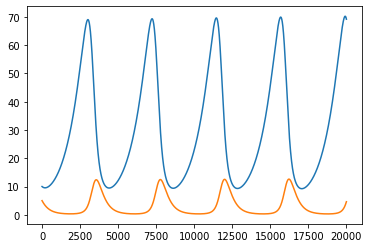

In [ ]:
# Simulation - PP

import numpy as np
import matplotlib.pyplot as plt

T = 20.0
T_unit = 0.001
U_start = 10.0
V_start = 5.0

alpha = 1.0
beta = 3.0
gamma = 0.3
e = 0.333

# dU/dt=alpha*U-gamma*U*V
# dV/dt=-beta*V+e*gamma*U*V

U = [U_start]
V = [V_start]
flag = True
for i in range(1, int(T / T_unit) + 1):
  U_old, V_old = U[-1], V[-1]
  if flag:
    print(((alpha * U_old) - gamma * U_old * V_old))
    print((- beta * V_old + e * gamma* U_old * V_old))
  U_new = U_old + ((alpha * U_old) - gamma * U_old * V_old) * T_unit
  V_new = V_old + (- beta * V_old + e * gamma* U_old * V_old) * T_unit
  U.append(U_new)
  V.append(V_new)
  flag = False
print(U)
print(V)
print(min(U), max(U))
print(min(V), max(V))
Y_hat = np.asarray([[u, v] for u, v in zip(U, V)])
plt.plot(Y_hat)

[0.0000e+00 2.0000e-03 4.0000e-03 ... 1.9996e+01 1.9998e+01 2.0000e+01]
<class 'numpy.ndarray'>


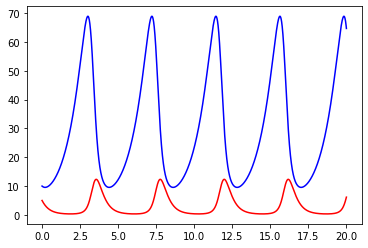

In [ ]:
# Simulation - PP - odeint

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

U_start = 10.0
V_start = 5.0
alpha = 1.0
beta = 3.0
gamma = 0.3
e = 0.333

# def pend(y, t, a, b, c, d):
#     U, V = y
#     dydt = [(a * U) - c * U * V, - b * V + d * c * U * V]
#     return dydt

# t = np.linspace(0, T, 10001)
# print(t)
# y0 = [U_start, V_start]
# sol = odeint(pend, y0, t, args=(alpha, beta, gamma, e))

def pend(y, t, a, b, c, d):
    map = y
    dydt = np.asarray([(a * map[0]) - c * map[0] * map[1], - b * map[1] + d * c * map[0] * map[1]])
    return dydt

t = np.linspace(0, T, 10001)
print(t)
y0 = np.asarray([U_start, V_start])
sol = odeint(pend, y0, t, args=(alpha, beta, gamma, e))
print(type(sol))

plt.plot(t, sol[:, 0], 'b', label='u')
plt.plot(t, sol[:, 1], 'r', label='v')

(10000, 2)


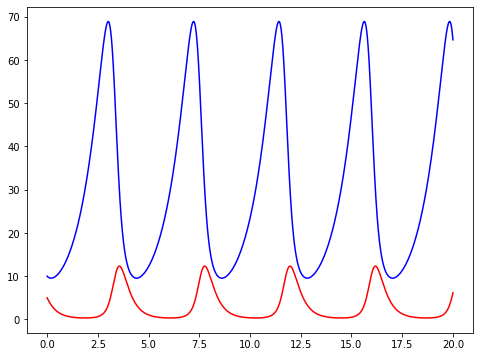

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

class GroundTruthPP:
  def __init__(self, t_max, length):
    U_start = 10.0
    V_start = 5.0
    alpha = 1.0
    beta = 3.0
    gamma = 0.3
    e = 0.333
    self.t = np.linspace(0, t_max, length)
    # print(t)
    y0 = np.asarray([U_start, V_start])
    self.data = odeint(self.pend, y0, self.t, args=(alpha, beta, gamma, e))
  
  @staticmethod
  def pend(y, t, a, b, c, d):
    map = y
    dydt = np.asarray([(a * map[0]) - c * map[0] * map[1], - b * map[1] + d * c * map[0] * map[1]])
    return dydt
  
  def print(self):
    plt.figure(figsize=(8, 6))
    plt.plot(self.t, self.data[:, 0], 'b', label='u')
    plt.plot(self.t, self.data[:, 1], 'r', label='v')
    plt.show()
    plt.clf()
    plt.close()


gt = GroundTruthPP(20, 10000)
print(gt.data.shape)
gt.print()

-5.0
-10.004999999999999
[10.0, 10.005, 10.0100245285075, 10.015073538808066, 10.02014698442943, 10.025244819140152, 10.030366996948267, 10.035513472099964, 10.040684199078262, 10.045879132601689, 10.051098227622978, 10.056341439327769, 10.06160872313331, 10.06690003468718, 10.072215329866008, 10.077554564774205, 10.082917695742697, 10.088304679327676, 10.09371547230935, 10.099150031690705, 10.104608314696268, 10.110090278770889, 10.115595881578512, 10.121125081000976, 10.1266778351368, 10.132254102299994, 10.137853841018865, 10.143477010034836, 10.149123568301267, 10.154793474982288, 10.16048668945164, 10.16620317129151, 10.171942880291393, 10.177705776446942, 10.183491819958837, 10.189300971231653, 10.19513319087274, 10.200988439691109, 10.206866678696318, 10.212767869097371, 10.218691972301626, 10.224638949913695, 10.230608763734372, 10.23660137575955, 10.242616748179147, 10.248654843376048, 10.25471562392504, 10.260799052591763, 10.266905092331662, 10.273033706288947, 10.2791848577

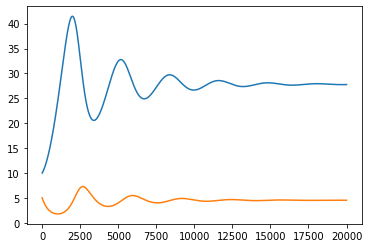

In [ ]:
# Simulation - PP——modified

import numpy as np
import matplotlib.pyplot as plt

T = 20.0
T_unit = 0.001
U_start = 10.0
V_start = 5.0

alpha = 1.0
beta = 3.0
gamma = 0.3
e = 0.333

# dU/dt=alpha*U-gamma*U*V
# dV/dt=-beta*V+e*gamma*U*V

U = [U_start]
V = [V_start]
flag = True
for i in range(1, int(T / T_unit) + 1):
  U_old, V_old = U[-1], V[-1]
  if flag:
    print(((alpha * U_old) - gamma * U_old * V_old))
    print((- beta * V_old + e * gamma* U_old * V_old))
  U_new = U_old + ((alpha * U_old) - gamma * U_old * V_old + 10) * T_unit
  V_new = V_old + (- beta * V_old + e * gamma* U_old * V_old + 1) * T_unit
  U.append(U_new)
  V.append(V_new)
  flag = False
print(U)
print(V)
Y_hat = np.asarray([[u, v] for u, v in zip(U, V)])
plt.plot(Y_hat)

[50.0, 49.755, 49.510053647250004, 49.26517280711653, 49.0203693279266, 48.77565503870065, 48.53104174689358, 48.28654123614502, 48.042165264039504, 47.797925559877605, 47.55383382245891, 47.309901717877665, 47.066140877332, 46.82256289494765, 46.57917932561695, 46.336001682854004, 46.09304143666689, 45.850310011447604, 45.607818783880774, 45.365579080871704, 45.123602177494696, 44.88189929496238, 44.640481598616816, 44.39936019594307, 44.158546134606055, 43.91805040051132, 43.67788391589049, 43.43805753741203, 43.198582054317995, 42.959468186587465, 42.72072658312718, 42.48236781999014, 42.244402398622576, 42.00684074414008, 41.76969320363326, 41.532970044503564, 41.29668145282976, 41.060837531765536, 40.8254482999688, 40.590523690062966, 40.35607354713086, 40.122107627241505, 39.88863559601023, 39.65566702719256, 39.42321140131206, 39.19127810432268, 38.959876426305726, 38.7290155602019, 38.498704600578534, 38.268952542432395, 38.03976828002823, 37.81116060577324, 37.58313820912774, 

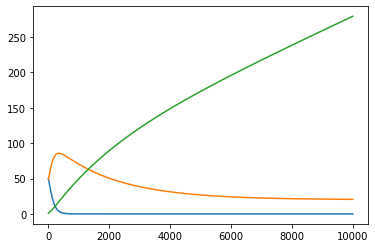

In [ ]:
# Simulation - SIS

import numpy as np
import matplotlib.pyplot as plt

T = 100.0
T_unit = 0.01
S_start = 50.0
I_start = 49.0
R_start = 1.0

beta = 0.01
gamma = 0.05

# dU/dt=alpha*U-gamma*U*V
# dV/dt=-beta*V+e*gamma*U*V

S = [S_start]
I = [I_start]
R = [R_start]
flag = True
for i in range(1, int(T / T_unit) + 1):
  S_old, I_old, R_old = S[-1], I[-1], R[-1]
  S_new = S_old + (- beta * S_old * I_old ) * T_unit
  I_new = I_old + (beta * S_old * I_old - gamma * I_old + 1) * T_unit
  R_new = R_old + (gamma * I_old + 1) * T_unit
  S.append(S_new)
  I.append(I_new)
  R.append(R_new)
  flag = False
print(S)
print(I)
print(R)
Y_hat = np.asarray([[s, i, r] for s, i, r in zip(S, I, R)])
plt.plot(Y_hat)

0.0985
-0.1495005
[0.1, 0.1000985, 0.10019560452386549, 0.100291318203607, 0.10038564567871897, 0.10047859159543399, 0.10057016060599223, 0.1006603573679259, 0.10074918654335857, 0.10083665279831922, 0.10092276080207074, 0.10100751522645302, 0.10109092074523997, 0.10117298203351087, 0.10125370376703546, 0.10133309062167285, 0.10141114727278394, 0.10148787839465731, 0.10156328865994838, 0.10163738273913159, 0.1017101652999656, 0.10178164100697121, 0.1018518145209219, 0.10192069049834687, 0.10198827359104629, 0.10205456844561876, 0.10211957970300077, 0.10218331199801785, 0.10224576995894753, 0.10230695820709375, 0.10236688135637259, 0.10242554401290926, 0.1024829507746461, 0.10253910623096145, 0.10259401496229932, 0.10264768153980959, 0.10270011052499867, 0.10275130646939047, 0.1028012739141975, 0.10285001739000187, 0.10289754141644632, 0.10294385050193479, 0.10298894914334263, 0.10303284182573619, 0.10307553302210172, 0.10311702719308333, 0.10315732878673001, 0.10319644223825152, 0.1032

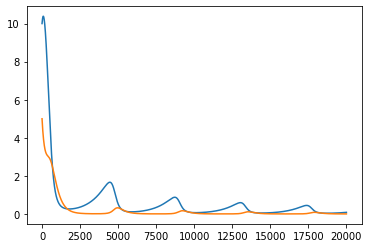

In [ ]:
# Simulation - 2

import numpy as np
import matplotlib.pyplot as plt

T = 20.0
T_unit = 0.001
U_start = 10.0
V_start = 5.0

alpha = 1.0
beta = 3.0
gamma = 0.3
e = 0.333

lb = 0.0
ub = 100.0
i = ub - lb

def encode(num):
  return (num - lb) / (ub - lb)

def decode(num):
  return lb + num * (ub - lb)

# dU/dt=alpha*U-gamma*U*V
# dV/dt=-beta*V+e*gamma*U*V

U = [encode(U_start)]
V = [encode(V_start)]
flag = True
for i in range(1, int(T / T_unit) + 1):
  U_old, V_old = U[-1], V[-1]
  # U_new = U_old + ((alpha * U_old) - gamma * U_old * V_old) * T_unit
  # V_new = V_old + (- beta * V_old + e * gamma* U_old * V_old) * T_unit
  if flag:
    print((alpha - gamma * (i * V_old + lb)) * (i * U_old + lb))
    print((- beta + e * gamma * (U_old * i + lb)) * (V_old * i + lb))
  U_new = U_old + (alpha - gamma * (i * V_old + lb)) * (i * U_old + lb) / i * T_unit
  V_new = V_old + (- beta + e * gamma * (U_old * i + lb)) * (V_old * i + lb) / i * T_unit
  U.append(U_new)
  V.append(V_new)
  flag = False
print(U)
print(V)
Y_hat = np.asarray([[decode(u), decode(v)] for u, v in zip(U, V)])
plt.plot(Y_hat)

[89.0, 88.9677, 88.9353208309512, 88.90286237746656, 88.8703245244566] ... [17.5107514518392, 17.510750106381558, 17.51074875258597, 17.51074739046806, 17.510746020043417]
[10.0, 10.0286, 10.0572688390488, 10.086006608096824, 10.11481339776787] ... [35.33274983965803, 35.33276503479236, 35.33278022803167, 35.33279541936419, 35.33281060877814]
[1.0, 1.0037, 1.0074103300000001, 1.0111310144366197, 1.0148620777755275] ... [47.15649870850294, 47.156484858826246, 47.156471019382515, 47.15645719016791, 47.15644337117861]
s_last: 0.17500000000000002
i_last: 0.3535714285714286
r_last: 0.4714285714285714


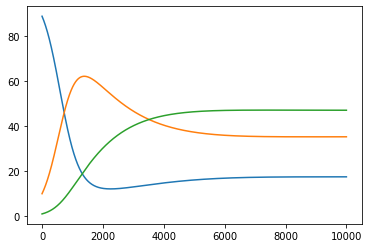

In [ ]:
# Simulation - SIR - modified

import numpy as np
import matplotlib.pyplot as plt

T = 100.0
T_unit = 0.01
S_start = 89.0
I_start = 10.0
R_start = 1.0

beta = 0.4 # 0.4
gamma = 0.04 # 0.04
NN = S_start + I_start + R_start
mu = 0.03
lam = NN * mu




S = [S_start]
I = [I_start]
R = [R_start]

N = S[0] + I[0] + R[0]

flag = True
for i in range(1, int(T / T_unit) + 1):
  S_old, I_old, R_old = S[-1], I[-1], R[-1]
  
  S_new = S_old + (- beta * S_old * I_old / N - mu * S_old + lam) * T_unit
  I_new = I_old + (beta * S_old * I_old / N - gamma * I_old - mu * I_old) * T_unit
  R_new = R_old + (gamma * I_old - mu * R_old) * T_unit
  S.append(S_new)
  I.append(I_new)
  R.append(R_new)
  flag = False

r0 = beta / (gamma + mu)
s_last = (gamma + mu) / beta
i_last = mu / beta * (r0 - 1)
r_last = gamma / beta * (r0 - 1)

print(S[:5], "...", S[-5:])
print(I[:5], "...", I[-5:])
print(R[:5], "...", R[-5:])

print("s_last:", s_last)
print("i_last:", i_last)
print("r_last:", r_last)
Y_hat = np.asarray([[s, i, r] for s, i, r in zip(S, I, R)])
plt.plot(Y_hat)

X: [6.0, 6.0, 6.0000072, 6.0000215923199995, 6.0000431692944325, 6.000071923272137, 6.000107846616333, 6.000150931704596, 6.000201170928827, 6.0002585566952344] ... ... [3.455160457460824, 3.4548305120754446, 3.4545027264560932, 3.4541770996907557, 3.4538536308686143, 3.4535323190800504, 3.4532131634166454, 3.4528961629711814, 3.452581316837643, 3.4522686241112184]
Y: [6.0, 6.0072, 6.01439952, 6.021598566752573, 6.028797146998759, 6.035995267468057, 6.043192934878416, 6.050390155936225, 6.057586937336305, 6.064783285761901] ... ... [3.125215072081442, 3.1270448927241206, 3.1288759611183403, 3.130708277549357, 3.1325418423048963, 3.1343766556751516, 3.1362127179527794, 3.138050029432897, 3.1398885904130767, 3.1417284011933435]
Z: [15.0, 14.9996, 14.999204426666665, 14.998813282861923, 14.998426571461906, 14.99804429535694, 14.997666457451514, 14.997293060664244, 14.996924107927866, 14.996559602189192] ... ... [21.799587092227373, 21.794853680956592, 21.790122060985805, 21.78539223282338

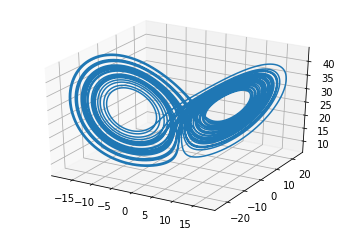

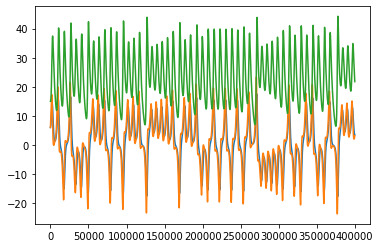

<Figure size 432x288 with 0 Axes>

In [ ]:
# Simulation - Lorenz

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

T = 40.0
T_unit = 0.0001
X_start = 6.0
Y_start = 6.0
Z_start = 15.0

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0



X = [X_start]
Y = [Y_start]
Z = [Z_start]

for i in range(1, int(T / T_unit) + 1):
  X_old, Y_old, Z_old = X[-1], Y[-1], Z[-1]
  
  X_new = X_old + (sigma * (Y_old - X_old)) * T_unit
  Y_new = Y_old + (X_old * (rho - Z_old) - Y_old) * T_unit
  Z_new = Z_old + (X_old * Y_old - beta * Z_old) * T_unit
  X.append(X_new)
  Y.append(Y_new)
  Z.append(Z_new)


print_array_length = 10
print("X:", X[:print_array_length], "... ...", X[-print_array_length:])
print("Y:", Y[:print_array_length], "... ...", Y[-print_array_length:])
print("Z:", Z[:print_array_length], "... ...", Z[-print_array_length:])

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(X, Y, Z)
plt.draw()
plt.show()

plt.plot(np.asarray([[x, y, z] for x, y, z in zip(X, Y, Z)]))
plt.show()
plt.clf()

X: [-4.053, -3.907209809, -3.7635305003878594, -3.622540241501086, -3.4847111826244657, -3.3504184656872606, -3.219949838594201, -3.0935154513804877, -2.9712575011426345, -2.853259476787393] ... ... [-0.30760860851760125, -0.3058579996383484, -0.3040770660828034, -0.3022659903785665, -0.3004249580380313, -0.2985541575394127, -0.29665378030748146, -0.29472402069400744, -0.29276507595791357, -0.29077714624514245]
Y: [-4.468, -4.397066804, -4.323929531474211, -4.249258511851358, -4.173653735552146, -4.097645908643241, -4.02169892478384, -3.946213386421383, -3.8715308499785976, -3.7979385178298593] ... ... [-0.17123680602272184, -0.174291604551151, -0.17732852046540284, -0.18034725285328576, -0.18334750266421307, -0.1863289727387982, -0.18929136783825662, -0.1922343946736117, -0.19515776193470163, -0.19806118031898437]
Z: [25.947, 26.519141649999998, 26.973208816019227, 27.31757479624349, 27.560645841523115, 27.71074342597678, 27.776006549069884, 27.764313181849904, 27.683219419712465, 27.

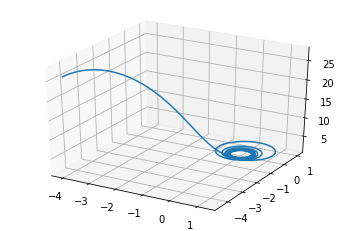

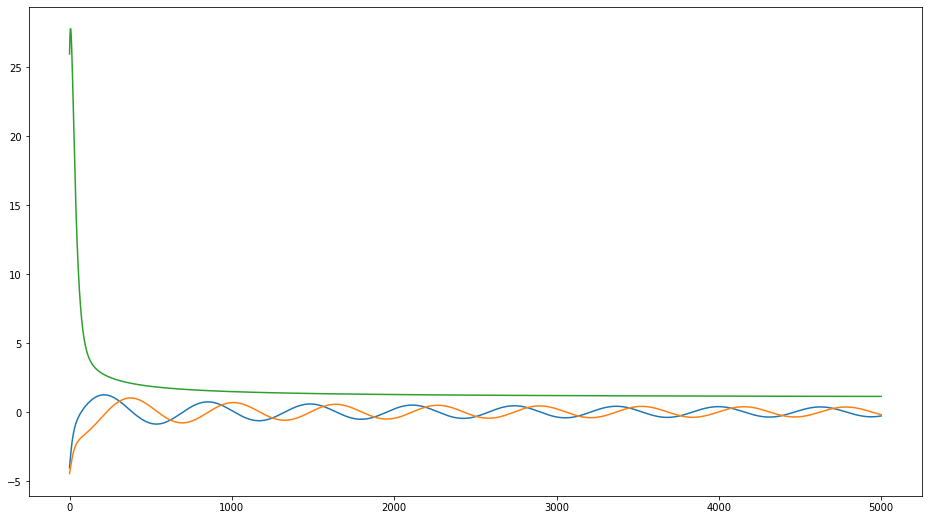

<Figure size 432x288 with 0 Axes>

In [ ]:
# Simulation - ULEND

import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

T = 50.0
T_unit = 0.01


mu = 0.1
omega = 1.0
A = -0.1
lam = 5.0


X_start = -4.053#1.0
Y_start = -4.468#-1.0
Z_start = 25.947#2.0
# -4.053,-4.468,25.947)

# X_start = -math.sqrt(-(mu + omega) / (2 * A)) # 1.0
# Y_start = math.sqrt(-(mu + omega) / (2 * A)) # -1.0
# Z_start = -(mu+omega)/A # 2.0

# print((mu * X_start - omega * Y_start + A * X_start * Z_start))
# print((omega * X_start + mu * Y_start + A * Y_start * Z_start))
# print((- lam * (Z_start - X_start ** 2 - Y_start ** 2) + 5.0 ))

X = [X_start]
Y = [Y_start]
Z = [Z_start]

for i in range(1, int(T / T_unit) + 1):
  X_old, Y_old, Z_old = X[-1], Y[-1], Z[-1]
  
  X_new = X_old + (mu * X_old - omega * Y_old + A * X_old * Z_old) * T_unit
  Y_new = Y_old + (omega * X_old + mu * Y_old + A * Y_old * Z_old) * T_unit
  Z_new = Z_old + (- lam * (Z_old - X_old ** 2 - Y_old ** 2) + 5.0 ) * T_unit
  X.append(X_new)
  Y.append(Y_new)
  Z.append(Z_new)


print_array_length = 10
print("X:", X[:print_array_length], "... ...", X[-print_array_length:])
print("Y:", Y[:print_array_length], "... ...", Y[-print_array_length:])
print("Z:", Z[:print_array_length], "... ...", Z[-print_array_length:])

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(X, Y, Z)
plt.draw()
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(np.asarray([[x, y, z] for x, y, z in zip(X, Y, Z)]))
plt.show()
plt.clf()

(5, 10000) (5, 10000) (5, 10000)
[[7.00000000e+01 6.99306755e+01 6.98612784e+01 ... 8.84293041e-02
  8.84265633e-02 8.84238239e-02]
 [7.00000000e+01 6.98760015e+01 6.97518372e+01 ... 4.39210876e-04
  4.39188728e-04 4.39166592e-04]
 [7.00000000e+01 6.99305232e+01 6.98609731e+01 ... 8.72836775e-02
  8.72809525e-02 8.72782290e-02]
 [7.00000000e+01 6.99424617e+01 6.98848507e+01 ... 2.76480573e-01
  2.76473375e-01 2.76466181e-01]
 [7.00000000e+01 6.99753700e+01 6.99507138e+01 ... 7.05447784e+00
  7.05437361e+00 7.05426943e+00]]
[[29.         29.0548245  29.10969415 ...  0.87892764  0.87849092
   0.87805442]
 [29.         29.10949849 29.21910807 ...  0.7601558   0.75977574
   0.75939588]
 [29.         29.05497675 29.10999942 ...  0.87840705  0.87797057
   0.87753431]
 [29.         29.04303832 29.08612777 ...  0.94956539  0.94909781
   0.94863046]
 [29.         29.01012999 29.02028111 ...  1.65036723  1.64964628
   1.64892564]]
[[ 1.          1.0145      1.02902741 ... 99.03264305 99.03308252

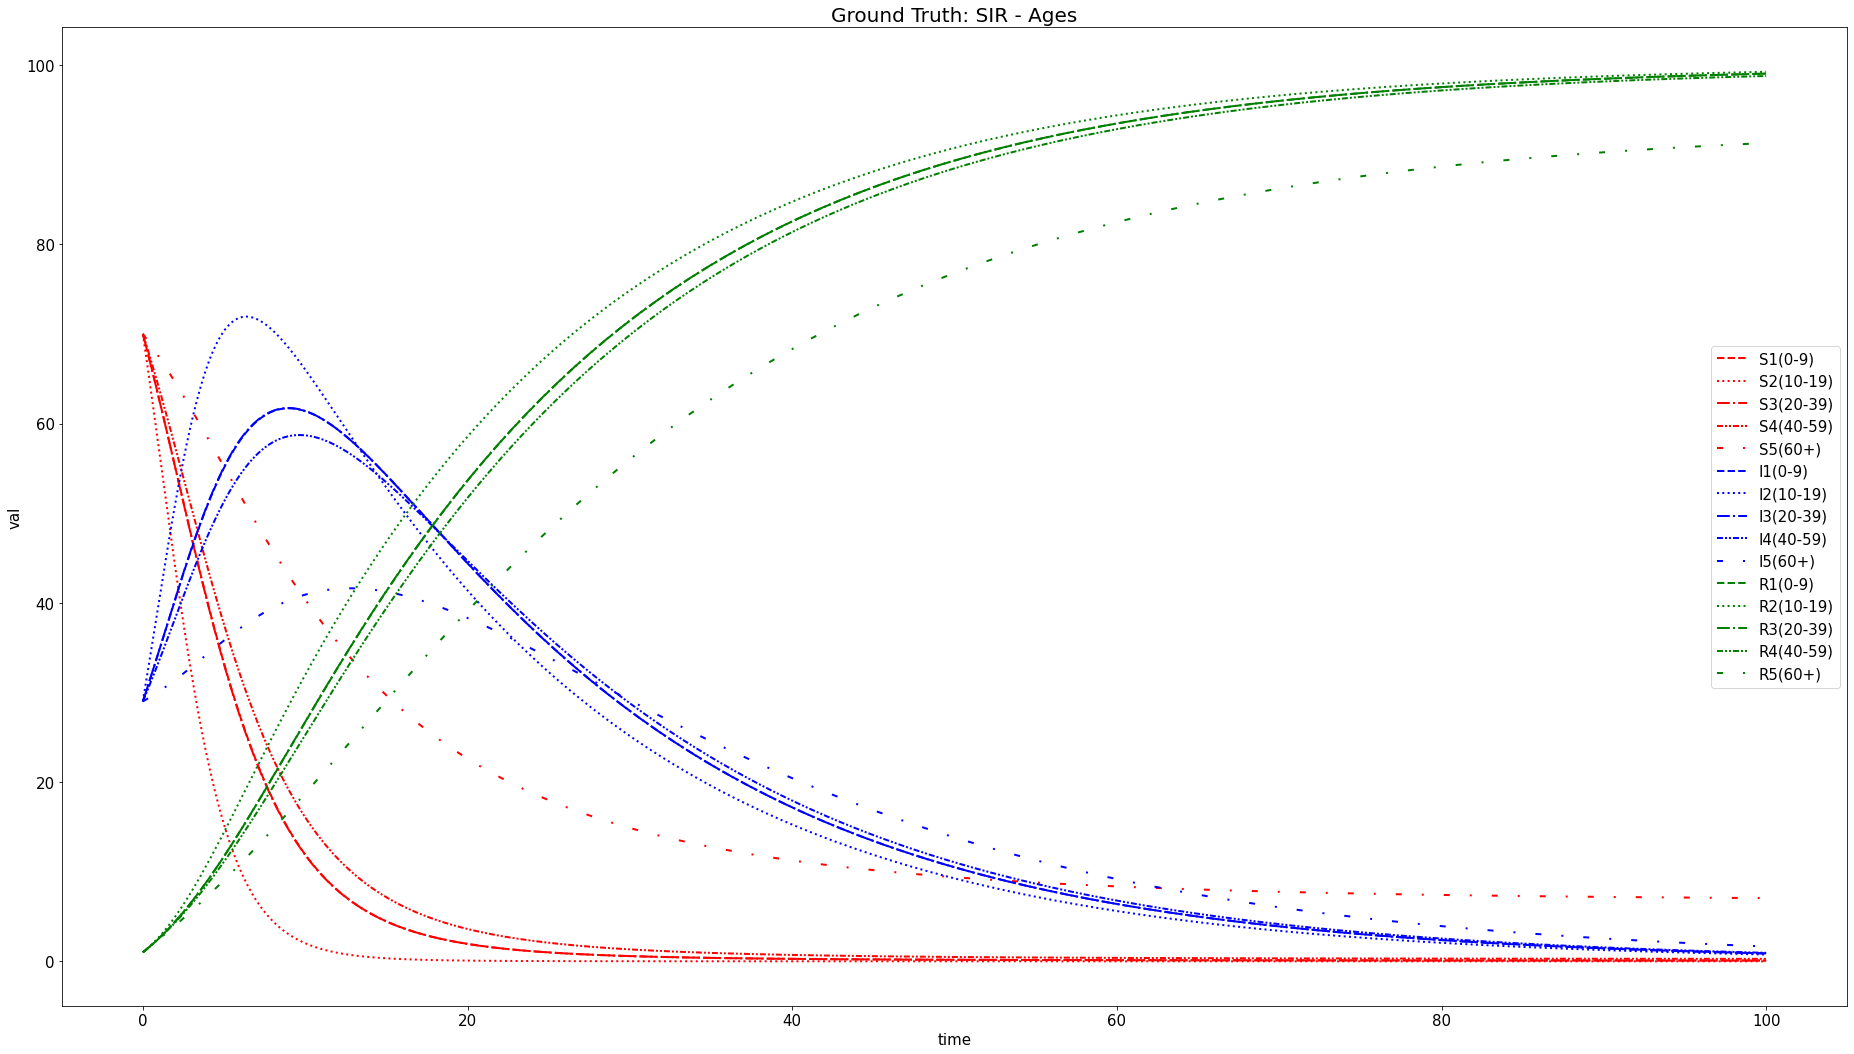

<Figure size 432x288 with 0 Axes>

In [ ]:
# Simulation - SIR Ages

import numpy as np
import matplotlib.pyplot as plt

T = 100.0
T_unit = 0.01
S_start = 70#99.0
I_start = 29#1.0
R_start = 1#0.0
N = S_start + I_start + R_start
n = 5

beta = 0.01
gamma = 0.05

# dU/dt=alpha*U-gamma*U*V
# dV/dt=-beta*V+e*gamma*U*V

S = [np.asarray([S_start] * n)]
I = [np.asarray([I_start] * n)]
R = [np.asarray([R_start] * n)]

M_Age = np.asarray([
  [19.200, 4.800, 5.050, 3.400, 1.700],
  [4.800, 42.400, 5.900, 6.250, 1.733],
  [5.050, 5.900, 14.000, 7.575, 1.700],
  [3.400, 6.250, 7.575, 9.575, 1.544],
  [1.700, 1.733, 1.700, 1.544, 5.456],
])

def get_partial(S_arr, I_arr, **params):
  beta = params["beta"]
  gamma = params["gamma"]
  N = params["N"]
  n = len(S_arr)
  ds = []
  di = []
  dr = []
  for i in range(n):
    ds.append(- beta * S_arr[i] / N * sum([M_Age[i][j] * I_arr[j] for j in range(n)]))
    di.append(beta * S_arr[i] / N * sum([M_Age[i][j] * I_arr[j] for j in range(n)]) - gamma * I_arr[i])
    dr.append(gamma * I_arr[i])
  return np.asarray(ds), np.asarray(di), np.asarray(dr)

import matplotlib.pyplot as plt

def draw_two_dimension(
        y_lists,
        x_list,
        color_list,
        line_style_list,
        legend_list=None,
        legend_fontsize=15,
        fig_title=None,
        fig_x_label="time",
        fig_y_label="val",
        show_flag=True,
        save_flag=False,
        save_path=None,
        save_dpi=300,
        fig_title_size=20,
        fig_grid=False,
        marker_size=0,
        line_width=2,
        x_label_size=15,
        y_label_size=15,
        number_label_size=15,
        fig_size=(8, 6)
) -> None:
    """
    Draw a 2D plot of several lines
    :param y_lists: (list[list]) y value of lines, each list in which is one line. e.g., [[2,3,4,5], [2,1,0,-1], [1,4,9,16]]
    :param x_list: (list) x value shared by all lines. e.g., [1,2,3,4]
    :param color_list: (list) color of each line. e.g., ["red", "blue", "green"]
    :param line_style_list: (list) line style of each line. e.g., ["solid", "dotted", "dashed"]
    :param legend_list: (list) legend of each line, which CAN BE LESS THAN NUMBER of LINES. e.g., ["red line", "blue line", "green line"]
    :param legend_fontsize: (float) legend fontsize. e.g., 15
    :param fig_title: (string) title of the figure. e.g., "Anonymous"
    :param fig_x_label: (string) x label of the figure. e.g., "time"
    :param fig_y_label: (string) y label of the figure. e.g., "val"
    :param show_flag: (boolean) whether you want to show the figure. e.g., True
    :param save_flag: (boolean) whether you want to save the figure. e.g., False
    :param save_path: (string) If you want to save the figure, give the save path. e.g., "./test.png"
    :param save_dpi: (integer) If you want to save the figure, give the save dpi. e.g., 300
    :param fig_title_size: (float) figure title size. e.g., 20
    :param fig_grid: (boolean) whether you want to display the grid. e.g., True
    :param marker_size: (float) marker size. e.g., 0
    :param line_width: (float) line width. e.g., 1
    :param x_label_size: (float) x label size. e.g., 15
    :param y_label_size: (float) y label size. e.g., 15
    :param number_label_size: (float) number label size. e.g., 15
    :param fig_size: (tuple) figure size. e.g., (8, 6)
    :return:
    """
    assert len(y_lists[0]) == len(x_list), "Dimension of y should be same to that of x"
    assert len(y_lists) == len(line_style_list) == len(color_list), "number of lines should be fixed"
    y_count = len(y_lists)
    plt.figure(figsize=fig_size)
    for i in range(y_count):
        plt.plot(x_list, y_lists[i], markersize=marker_size, linewidth=line_width, c=color_list[i], linestyle=line_style_list[i])
    plt.xlabel(fig_x_label, fontsize=x_label_size)
    plt.ylabel(fig_y_label, fontsize=y_label_size)
    plt.tick_params(labelsize=number_label_size)
    if legend_list:
        plt.legend(legend_list, fontsize=legend_fontsize)
    if fig_title:
        plt.title(fig_title, fontsize=fig_title_size)
    if fig_grid:
        plt.grid(True)
    if save_flag:
        plt.savefig(save_path, dpi=save_dpi)
    if show_flag:
        plt.show()
    plt.clf()


# if __name__ == "__main__":
#     x_list = range(10000)
#     y_lists = [
#         [0.005 * i + 10 for i in x_list],
#         [-0.005 * i - 30 for i in x_list],
#         [0.008 * i - 10 for i in x_list],
#         [-0.006 * i - 20 for i in x_list],
#         [-0.001 * i - 5 for i in x_list]
#     ]
#     color_list = ["red", "blue", "green", "cyan", "black"]
#     line_style_list = ["dashed", "dotted", "dashdot", "dashdot", "dashdot"]
#     legend_list = ["red line", "blue line", "green line", "cyan line", "black line"]





for i in range(1, int(T / T_unit)):
  S_old_list, I_old_list, R_old_list = np.asarray(S[-1]), np.asarray(I[-1]), np.asarray(R[-1])
  ds, di, dr = get_partial(S_old_list, I_old_list, beta=beta, gamma=gamma, N=N)
  S_new_list = S_old_list + ds * T_unit
  I_new_list = I_old_list + di * T_unit
  R_new_list = R_old_list + dr * T_unit
  S.append(S_new_list)
  I.append(I_new_list)
  R.append(R_new_list)

S = np.asarray(S).swapaxes(0, 1)
I = np.asarray(I).swapaxes(0, 1)
R = np.asarray(R).swapaxes(0, 1)
print(S.shape, I.shape, R.shape)
print(S)
print(I)
print(R)

labels = ["0-9", "10-19", "20-39", "40-59", "60+"]

y_lists = [S[i] for i in range(n)] + [I[i] for i in range(n)] + [R[i] for i in range(n)]
x_list = [T_unit * i for i in range(int(T/T_unit))]
color_list = ["red"] * n + ["blue"] * n + ["green"] * n
legend_list = ["S{}({})".format(i + 1, labels[i]) for i in range(n)] + ["I{}({})".format(i + 1, labels[i]) for i in range(n)] + ["R{}({})".format(i + 1, labels[i]) for i in range(n)]
line_style_list = ["dashed", "dotted", "dashdot", (0, (3, 1, 1, 1, 1, 1)), (0, (3, 10, 1, 10))] * 3

draw_two_dimension(
    y_lists=y_lists,
    x_list=x_list,
    color_list=color_list,
    legend_list=legend_list,
    line_style_list=line_style_list,
    fig_title="Ground Truth: SIR - Ages",
    fig_size=(32, 18),
    show_flag=True,
    save_flag=False,
    save_path=None
)

In [ ]:
!pip install minpy mxnet

     |████████████████████████████████| 47.3 MB 1.6 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
# Simulation - Turing ODE
import numpy as np
import matplotlib.pyplot as plt
import copy
import time
from scipy.integrate import odeint


def get_diffusion(maps, N, M, l, w, alpha, beta, gamma, b, c, m, q, d1, d2, s):
  u_input, v_input = maps[0], maps[1]

  u_from_left = np.roll(u_input, 1, axis=1)
  u_from_left[:, :1] = u_input[:, :1]
  u_from_right = np.roll(u_input, -1, axis=1)
  u_from_right[:, -1:] = u_input[:, -1:]
  u_from_top = np.roll(u_input, 1, axis=0)
  u_from_top[:1, :] = u_input[:1, :]
  u_from_bottom = np.roll(u_input, -1, axis=0)
  u_from_bottom[-1:, :] = u_input[-1:, :]

  v_from_left = np.roll(v_input, 1, axis=1)
  v_from_left[:, :1] = v_input[:, :1]
  v_from_right = np.roll(v_input, -1, axis=1)
  v_from_right[:, -1:] = v_input[:, -1:]
  v_from_top = np.roll(v_input, 1, axis=0)
  v_from_top[:1, :] = v_input[:1, :]
  v_from_bottom = np.roll(v_input, -1, axis=0)
  v_from_bottom[-1:, :] = v_input[-1:, :]

  u_diffusion = ((u_from_left + u_from_right - u_input * 2) / (l ** 2) + (u_from_top + u_from_bottom - u_input * 2) / (w ** 2)) * d1
  v_diffusion = ((v_from_left + v_from_right - v_input * 2) / (l ** 2) + (v_from_top + v_from_bottom - v_input * 2) / (w ** 2)) * d2
  return np.asarray([u_diffusion, v_diffusion])

def pend(y, t, N, M, l, w, alpha, beta, gamma, b, c, m, q, d1, d2, s):
  # print(N, l, w, alpha, beta, gamma, b, c, m, q, d1, d2, s)
  u, v = y[:N * M].reshape([N, M]), y[N * M:].reshape([N, M])
  maps = np.asarray([u, v])
  d_reaction = np.asarray([
                           u * (alpha - beta * u - q / (u + b)) - c * u * v / (m * v + 1),
                           v * (-gamma + s * u / (m * v + 1))])
  d_diffusion = get_diffusion(maps, N, M, l, w, alpha, beta, gamma, b, c, m, q, d1, d2, s)
  dydt = d_reaction + d_diffusion
  dydt = np.concatenate([dydt[0].flatten(), dydt[1].flatten()])
  return dydt

class Config:
  T = 1000
  T_unit = 1
  T_N = int(T / T_unit)
  N = 1000
  M = 1

  alpha = 1
  beta = 0.3
  gamma = 0.3
  b = 0.5
  c = 0.6
  m = 0.6
  q = 0.35
  d1 = 0.015
  d2 = 1

  s = 2.45  #1.75, 1.9, 2.0, 2.45, 3.0

  l = 1
  w = 1


def turing_ground_truth(s=None, N=None, M=None):
  config = Config
  if s:
    config.s = s
  if N:
    config.N = N
  if M:
    config.M = M
  # config.T = config.N * config.M
  param_keys = ["N", "M", "l", "w", "alpha", "beta", "gamma", "b", "c", "m", "q", "d1", "d2", "s"]
  config_tuple = tuple(config.__dict__.get(one_key) for one_key in param_keys)
  print({param_keys[i]: config_tuple[i] for i in range(len(config_tuple))})

  np.random.seed(0)
  u_0 = np.random.rand(config.N, config.M)
  v_0 = np.random.rand(config.N, config.M)
  t = np.linspace(0, config.T, config.T)
  # t = t.reshape([config.T_N + 1, 1])
  # print(type(t), t.ndim)

  y0 = np.concatenate([u_0.flatten(), v_0.flatten()])

  sol = odeint(pend, y0, t, args=config_tuple)
  print(sol.shape)
  u = sol[:, :config.N * config.M].swapaxes(0, 1)
  v = sol[:, config.N * config.M:].swapaxes(0, 1)

  fig = plt.figure(figsize=(24, 9))

  ax1 = fig.add_subplot(121)
  im1 = ax1.imshow(u, cmap=plt.cm.jet, vmin=sol[:,:config.N * config.M][-1:,:].min(), vmax=sol[:,:config.N * config.M][-1:,:].max(), aspect='auto')
  ax1.set_title("u (s={0:.2f})".format(config.s))
  cb1 = plt.colorbar(im1, shrink=1)

  ax2 = fig.add_subplot(122)
  im2 = ax2.imshow(v, cmap=plt.cm.jet, vmin=sol[:,config.N * config.M:][-1:,:].min(), vmax=sol[:,config.N * config.M:][-1:,:].max(), aspect='auto')
  ax2.set_title("v (s={0:.2f})".format(config.s))
  cb2 = plt.colorbar(im2, shrink=1)
  plt.tight_layout()
  plt.show()

  # show_step = 100
  
  # u_old, v_old = sol[0][:config.N * config.M].reshape([config.N, config.M]), sol[0][config.N * config.M:].reshape([config.N, config.M])
  # for i in range(config.T_N + 1):
  #   t = i * config.T_unit
  #   if i % show_step == 0:
  #     map_raw = sol[i]
  #     u = map_raw[:config.N * config.M].reshape([config.N, config.M])
  #     v = map_raw[config.N * config.M:].reshape([config.N, config.M])
  #     # print("u =\n", u)
  #     # print("v =\n", v)

  #     fig = plt.figure(figsize=(24, 12))
  #     ax1 = fig.add_subplot(121)
  #     im1 = ax1.imshow(u, cmap=plt.cm.hsv)
  #     ax1.set_title("u (s={0:.2f} t={1:.2f} min={2:.3f} max={3:.3f} average_delta={4:.3e})".format(config.s, t, u.min(), u.max(), (u-u_old).mean()))
  #     cb1 = plt.colorbar(im1, shrink=0.74)

  #     ax2 = fig.add_subplot(122)
  #     im2 = ax2.imshow(v, cmap=plt.cm.hsv)
  #     ax2.set_title("v (s={0:.2f} t={1:.2f} min={2:.3f} max={3:.3f} average_delta={4:.3e})".format(config.s, t, v.min(), v.max(), (v-v_old).mean()))
  #     cb2 = plt.colorbar(im2, shrink=0.74)
  #     plt.show()
  #     u_old, v_old = u, v




{'N': 100, 'M': 1, 'l': 1, 'w': 1, 'alpha': 1, 'beta': 0.3, 'gamma': 0.3, 'b': 0.5, 'c': 0.6, 'm': 0.6, 'q': 0.35, 'd1': 0.015, 'd2': 1, 's': 3}
(1000, 200)


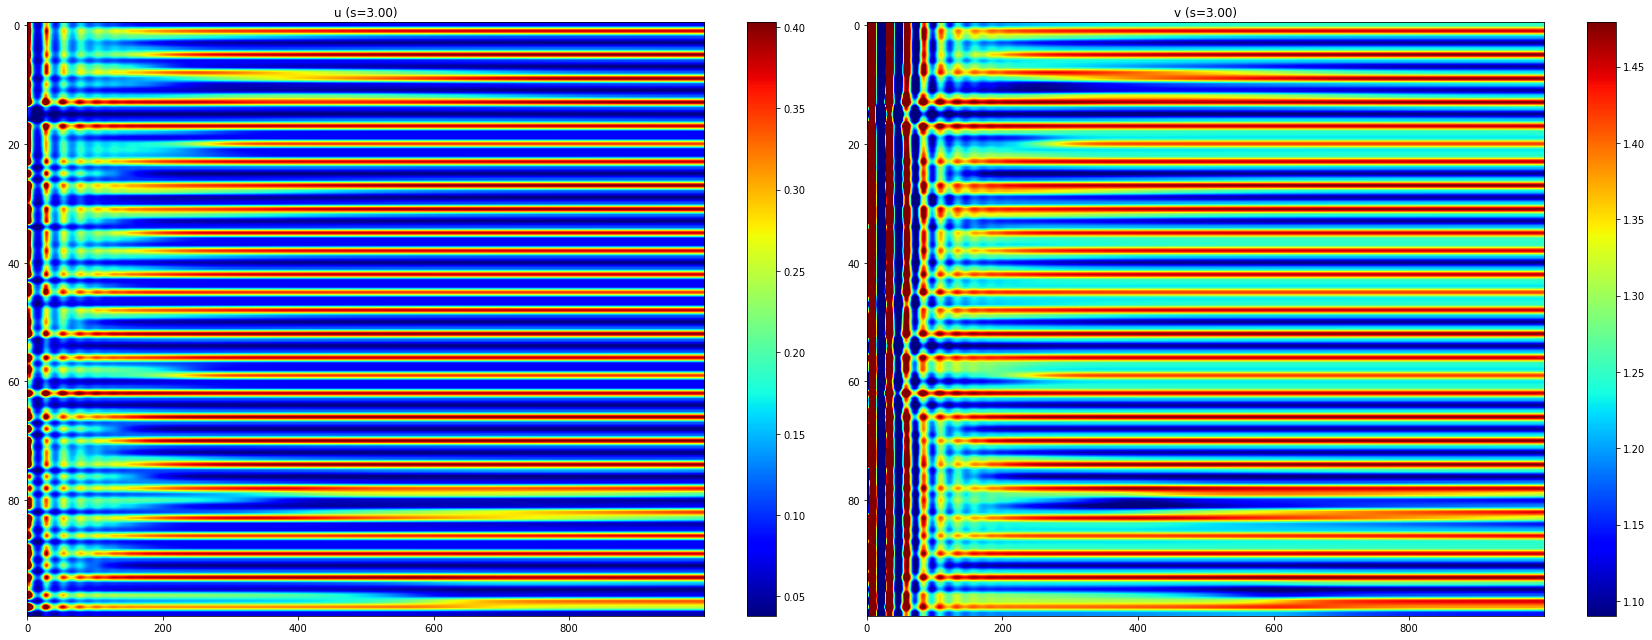

In [ ]:

turing_ground_truth(s=3, N=100, M=1)

{'N': 40, 'l': 1, 'w': 1, 'alpha': 1, 'beta': 0.3, 'gamma': 0.3, 'b': 0.5, 'c': 0.6, 'm': 0.6, 'q': 0.35, 'd1': 0.015, 'd2': 1, 's': 1.75}


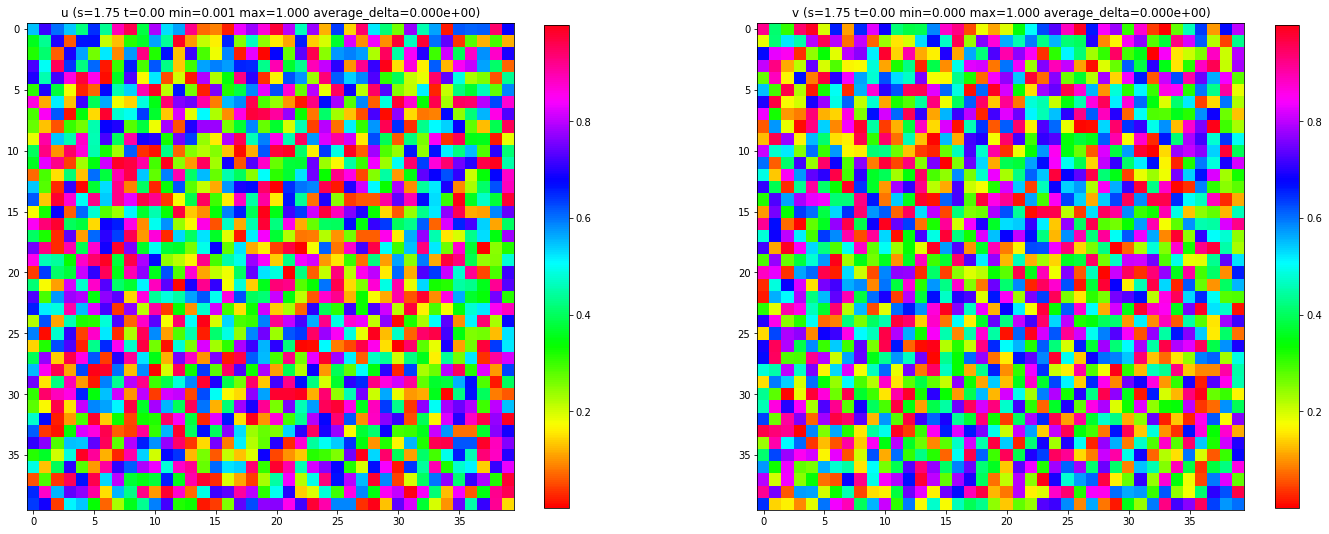

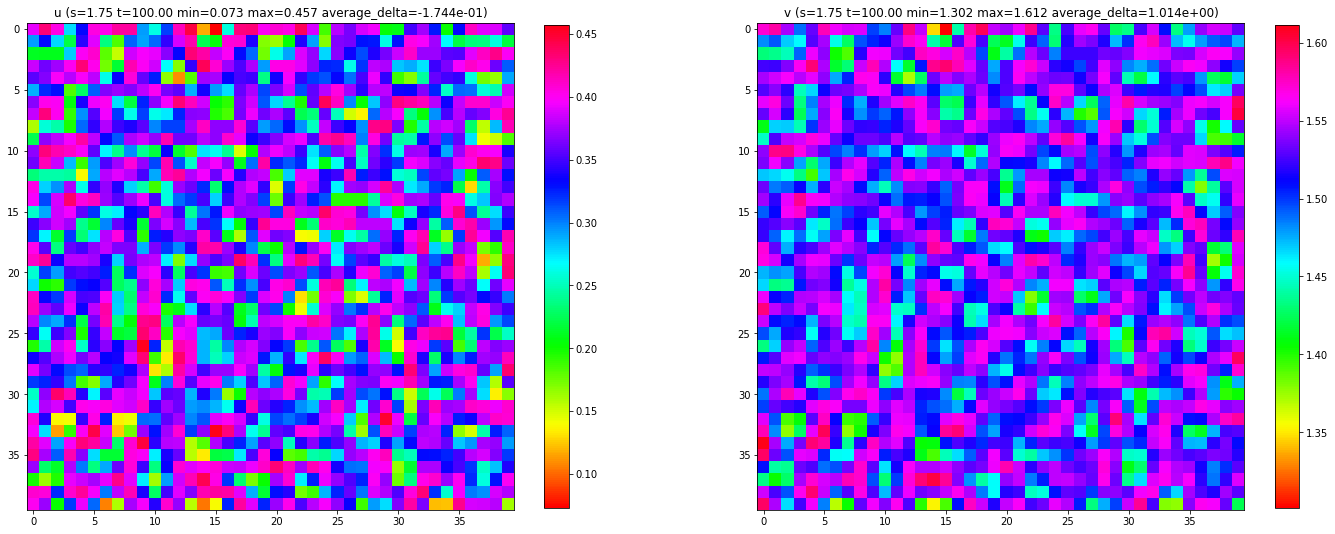

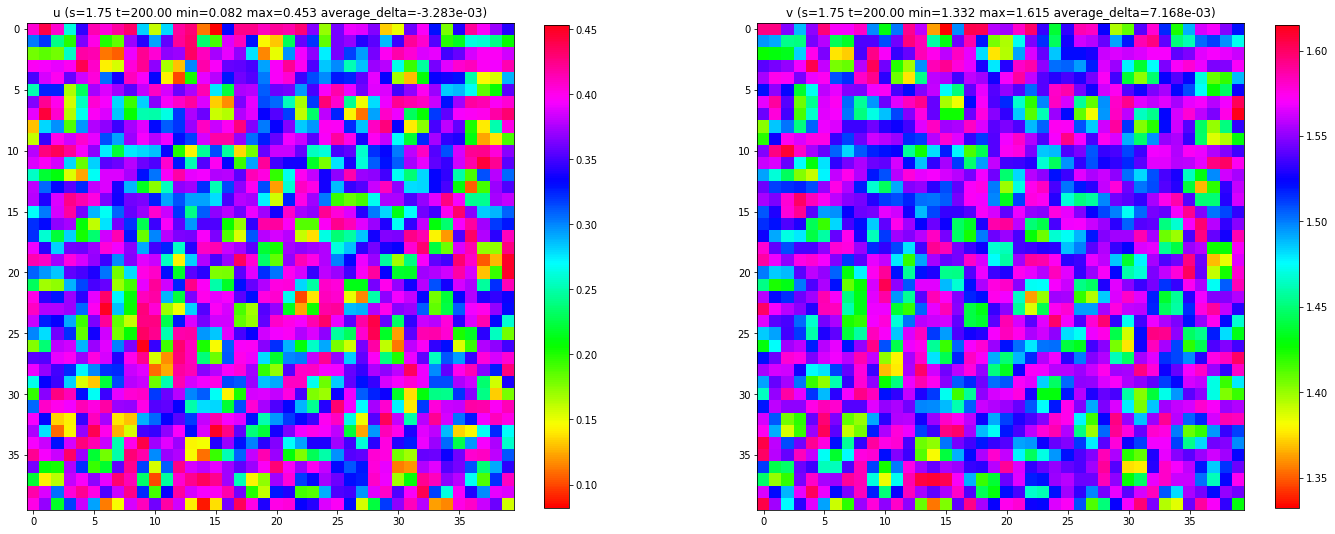

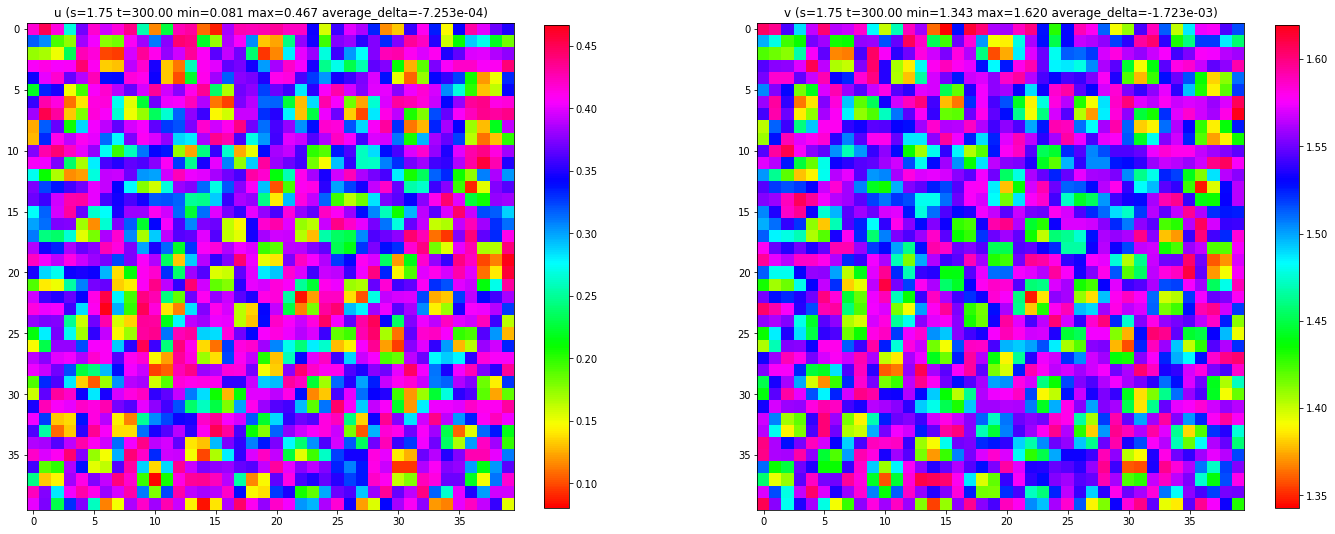

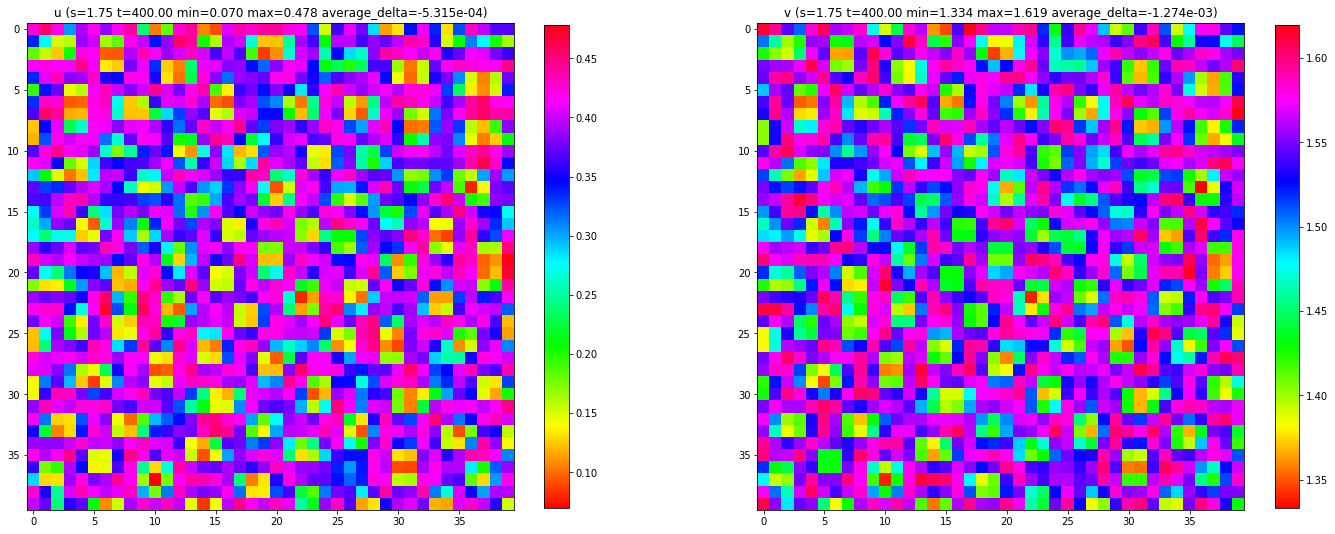

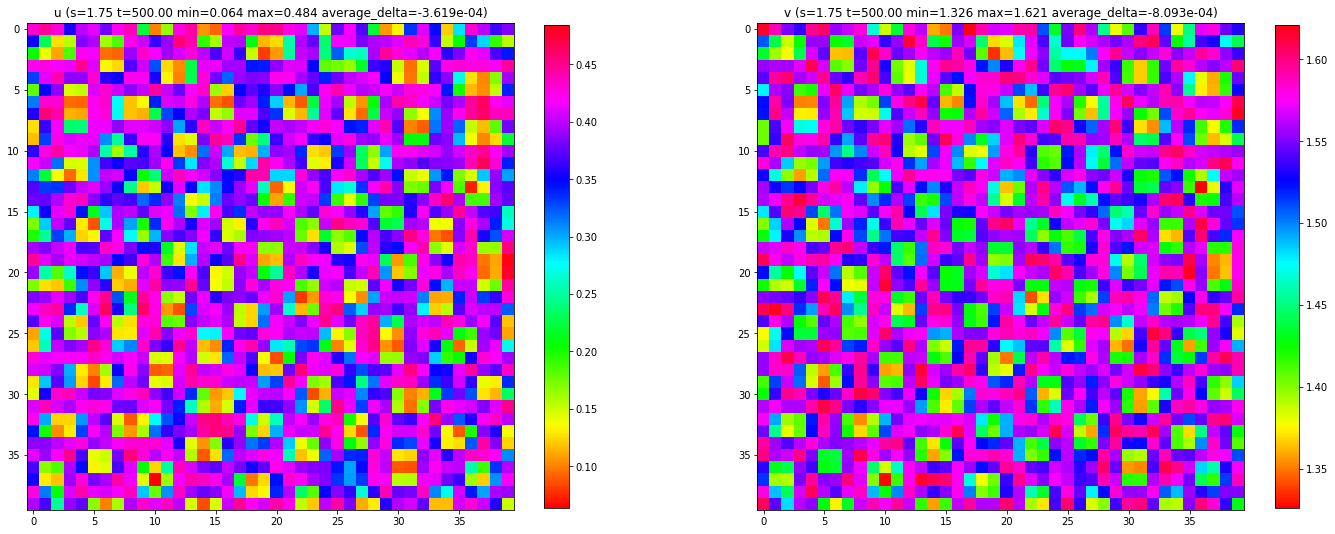

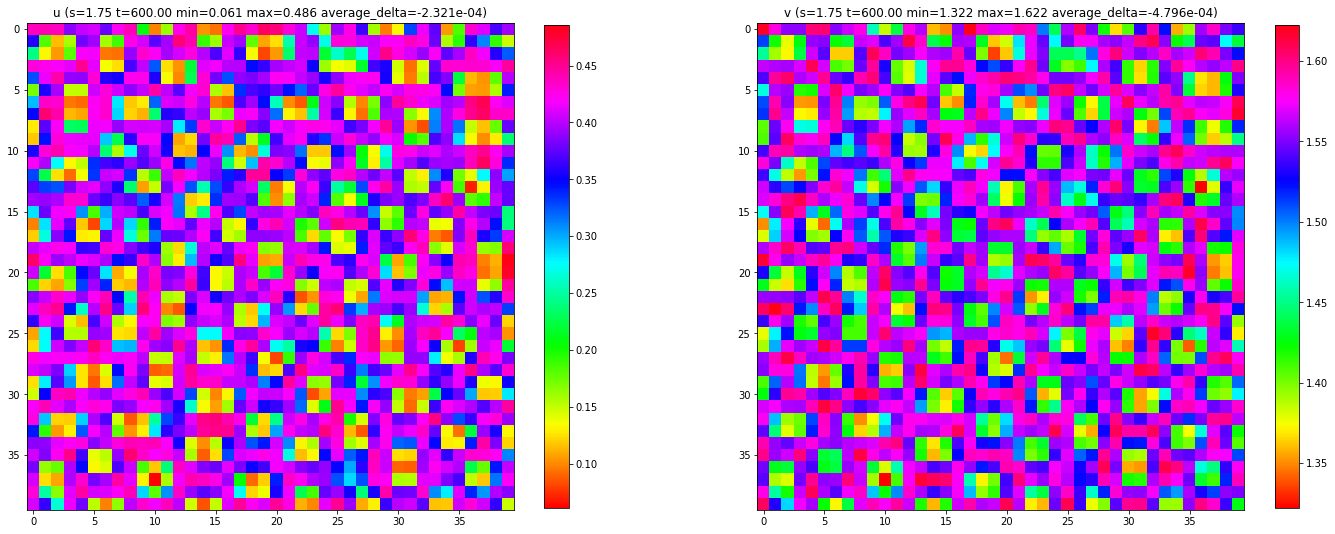

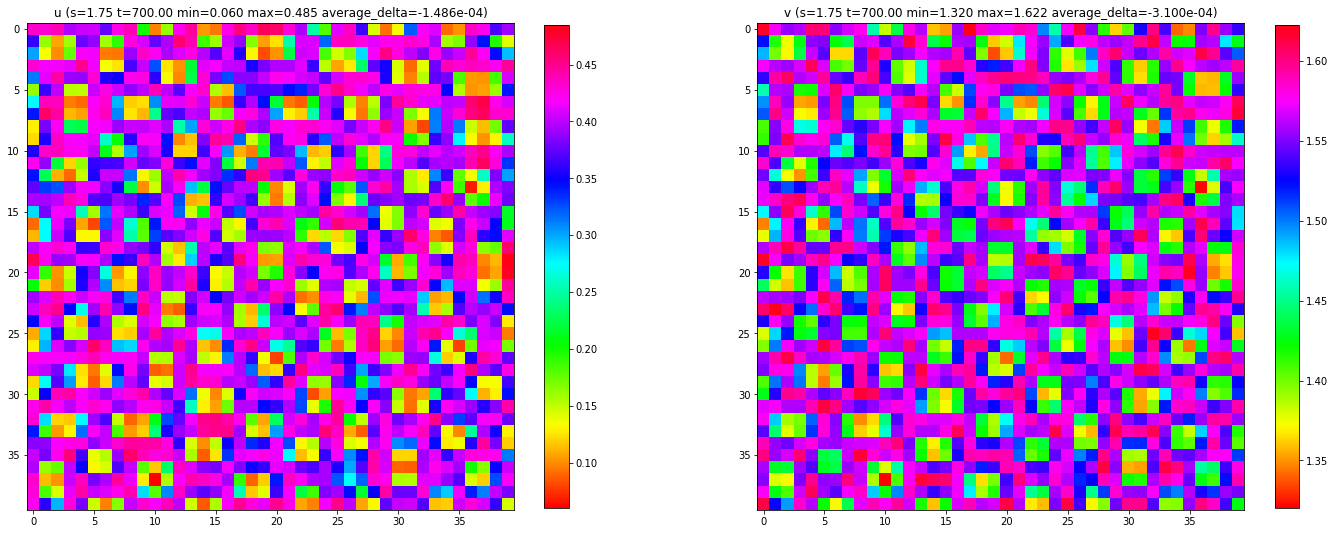

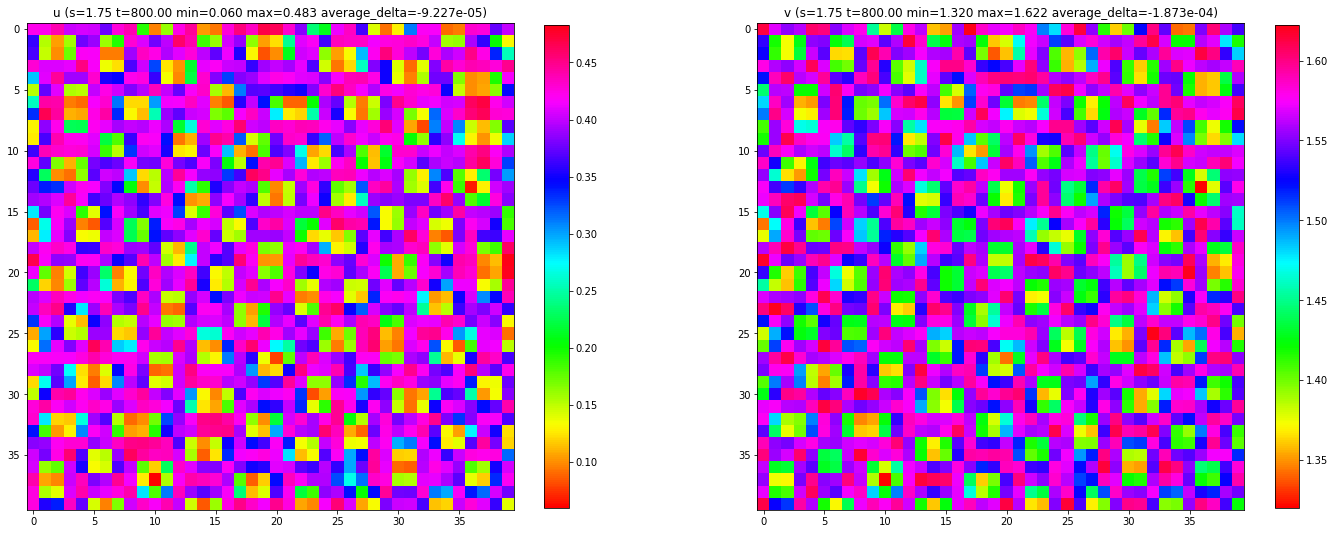

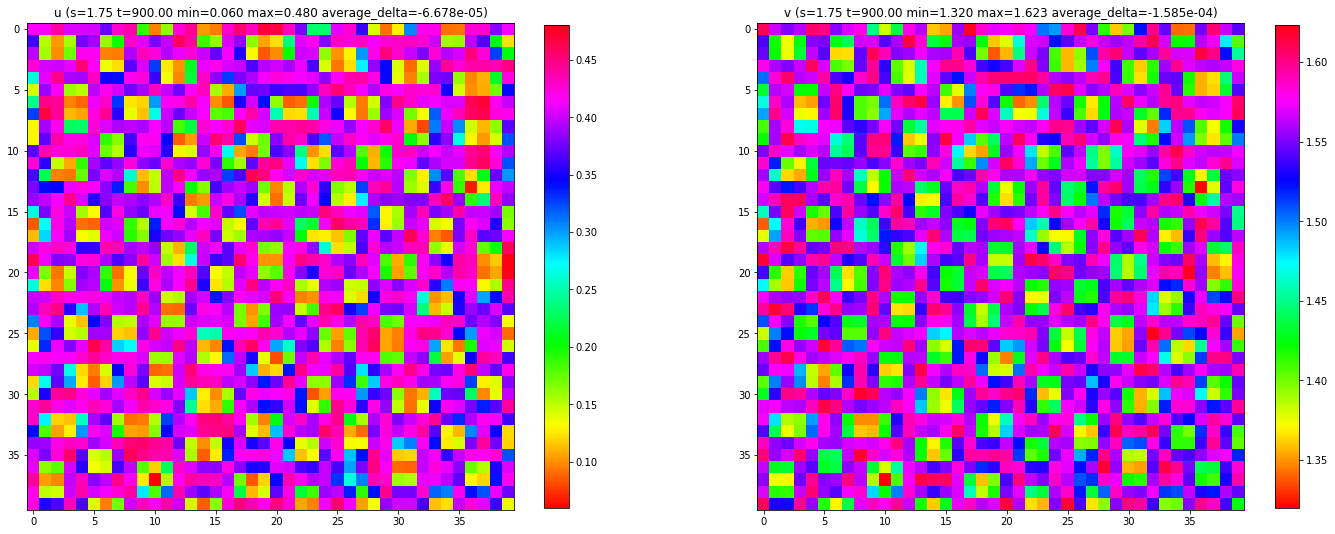

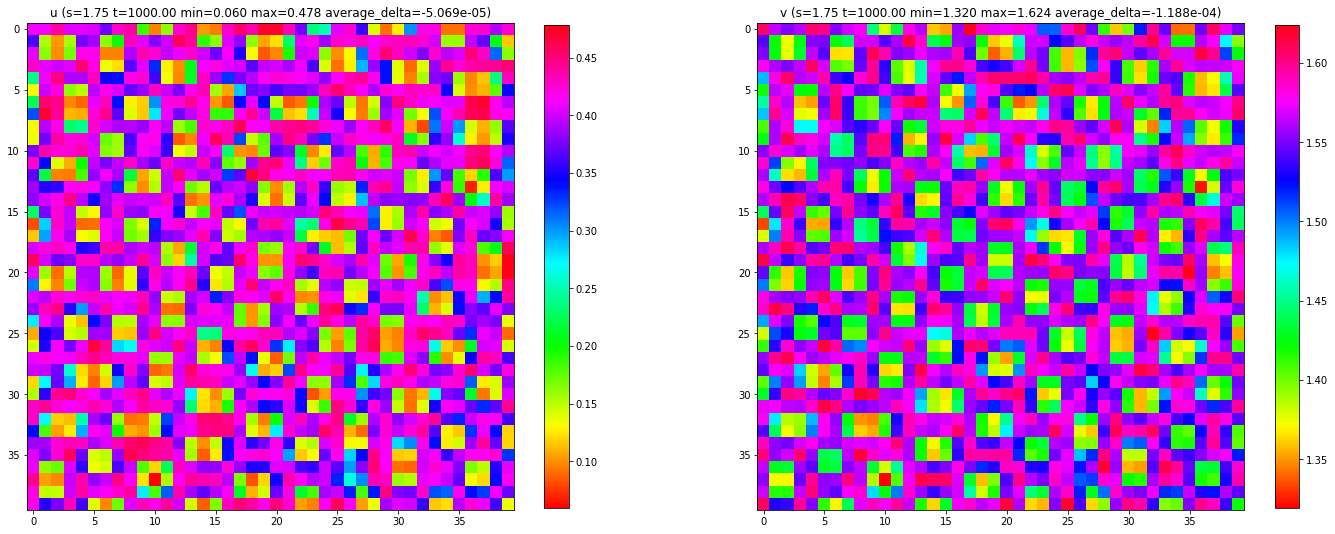

In [ ]:
turing_ground_truth(1.75)

{'N': 40, 'l': 1, 'w': 1, 'alpha': 1, 'beta': 0.3, 'gamma': 0.3, 'b': 0.5, 'c': 0.6, 'm': 0.6, 'q': 0.35, 'd1': 0.015, 'd2': 1, 's': 1.9}


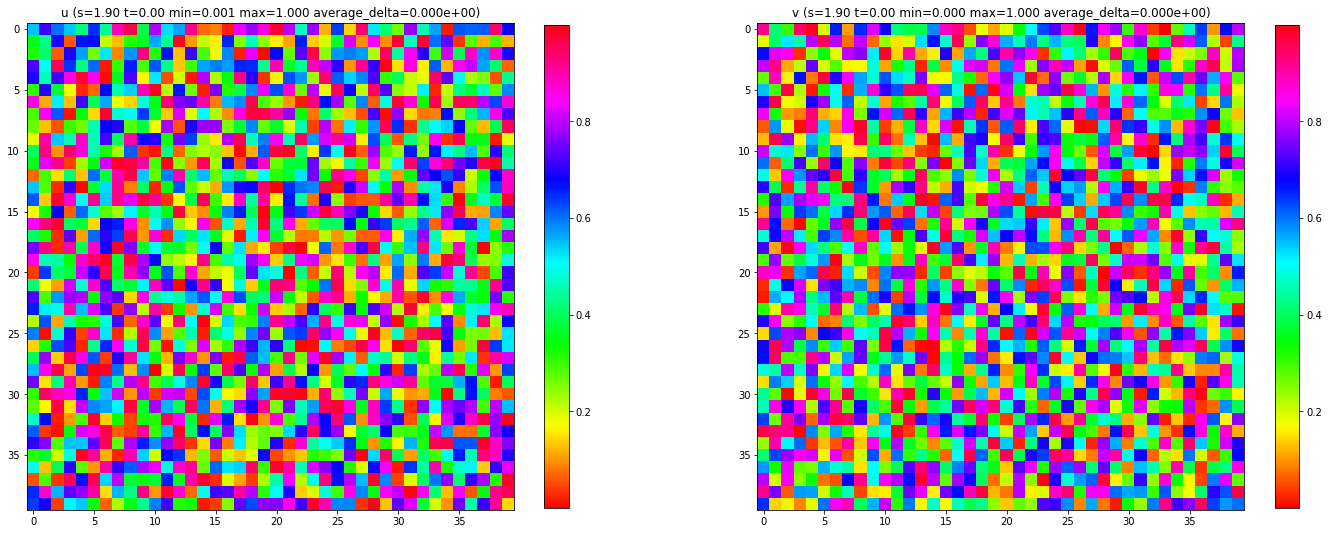

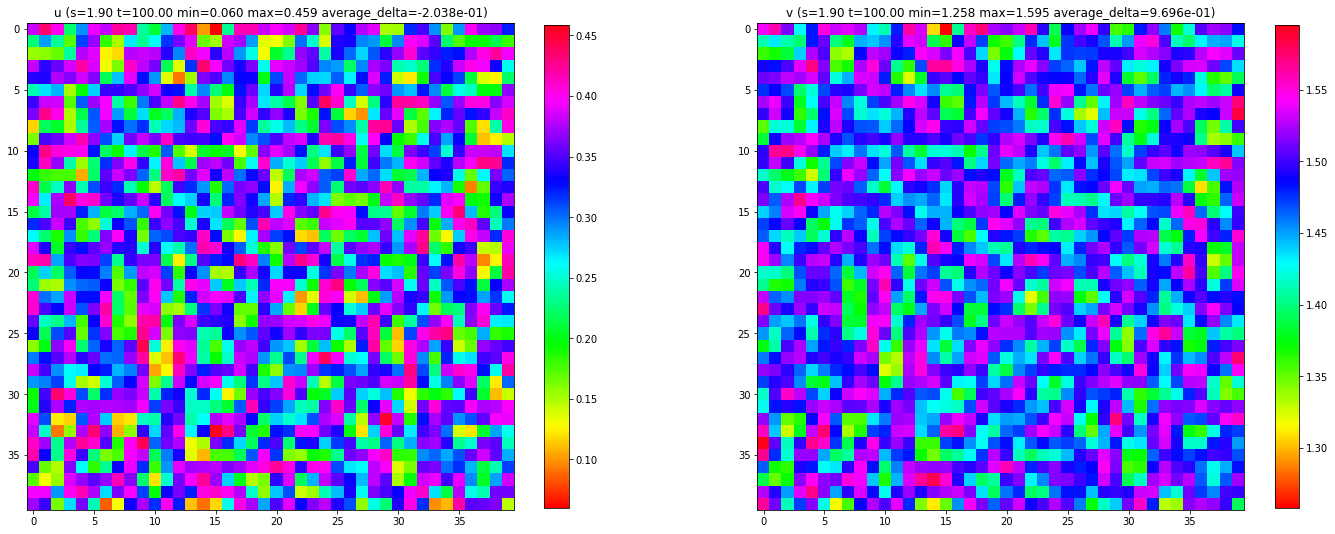

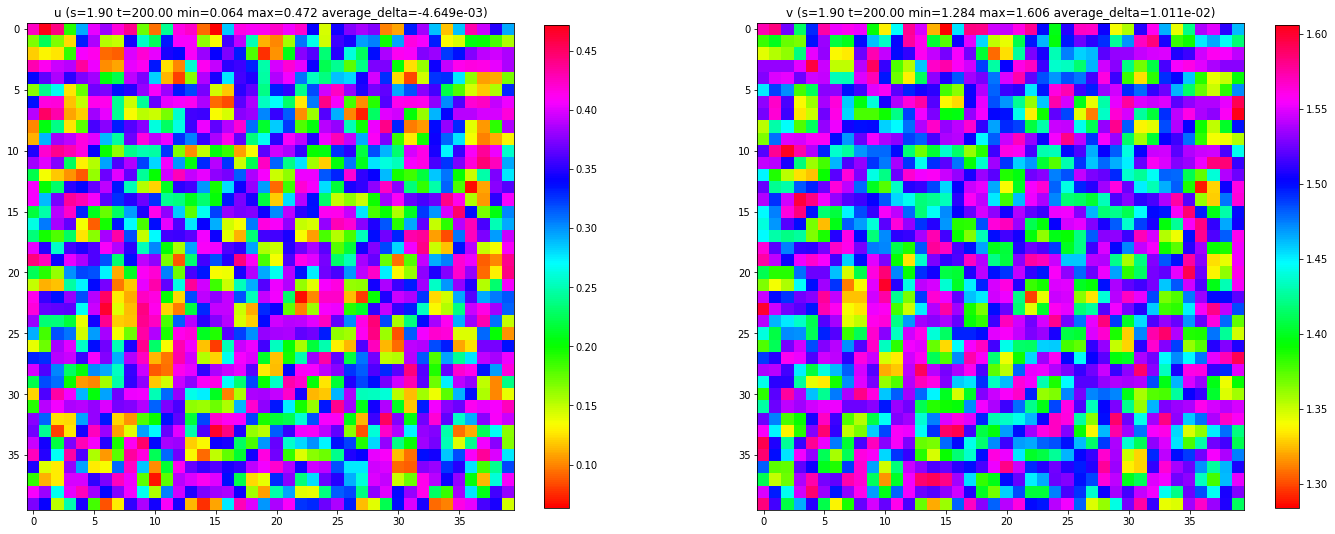

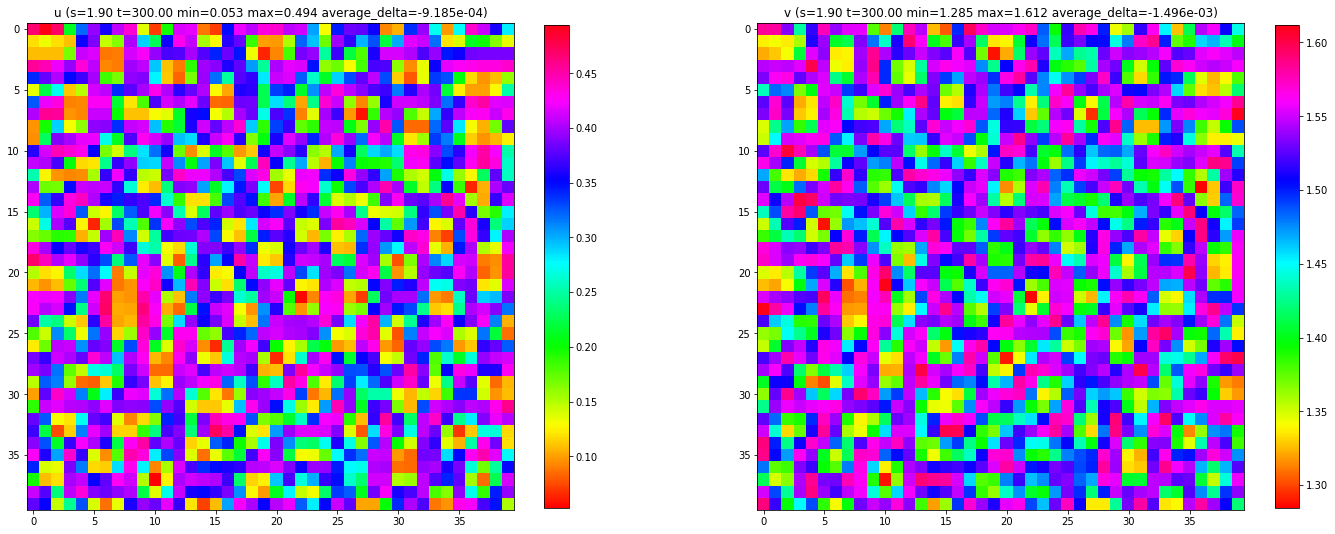

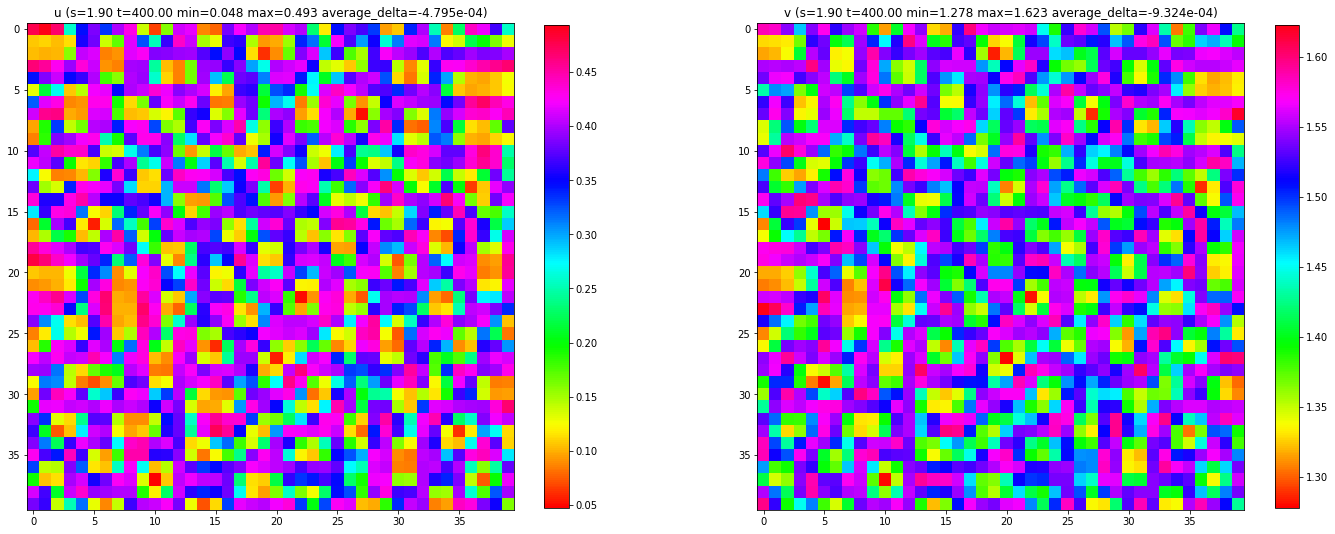

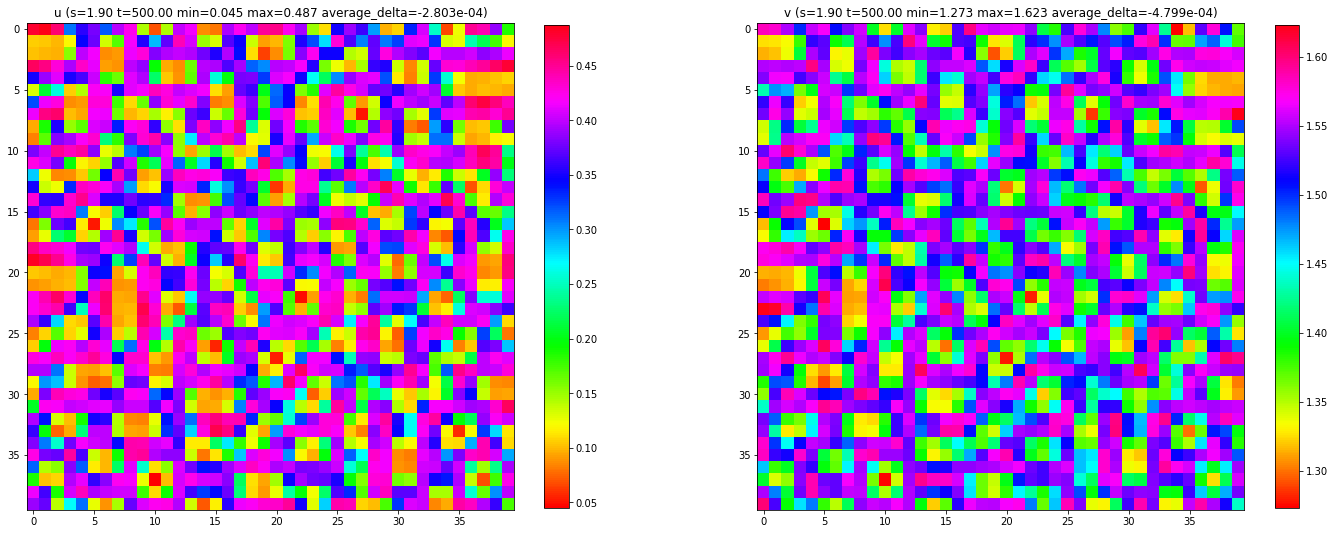

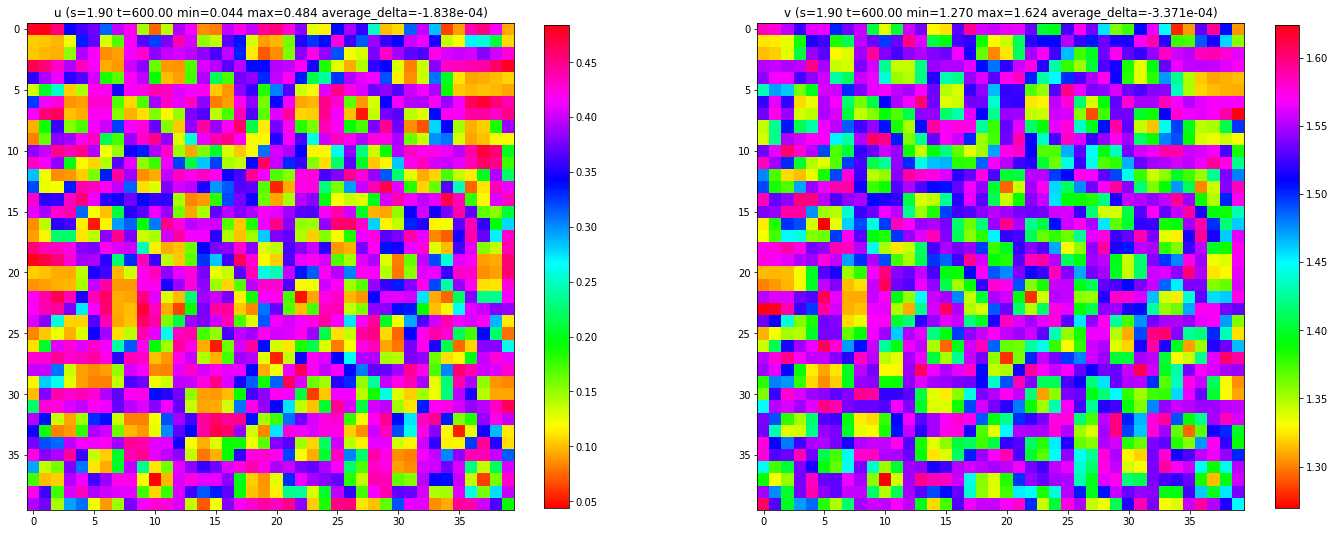

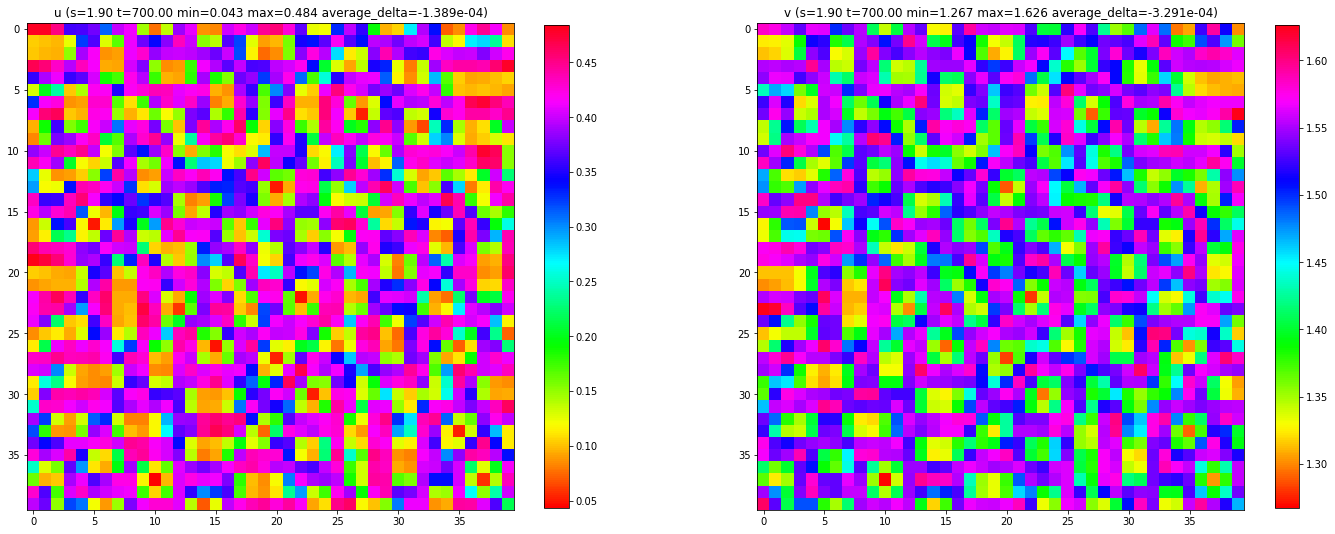

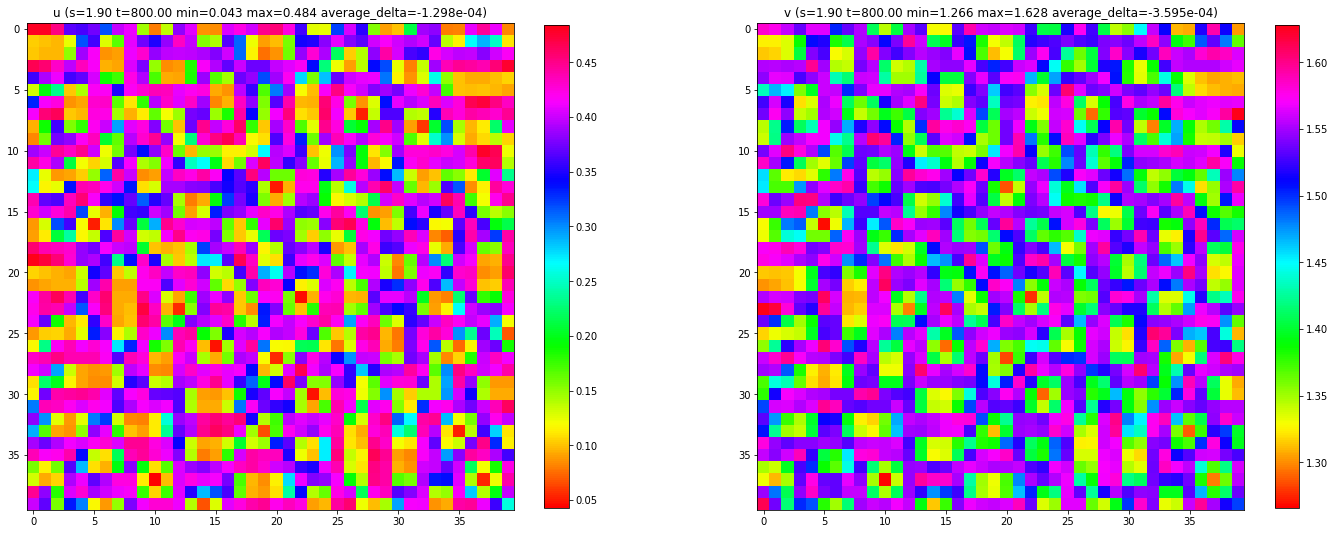

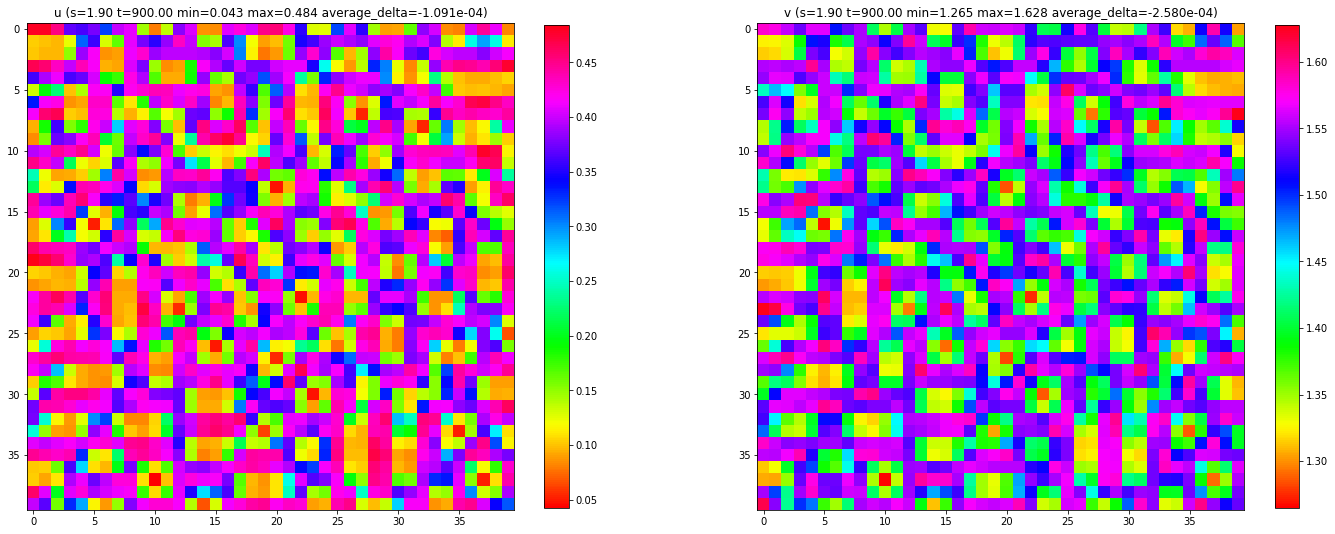

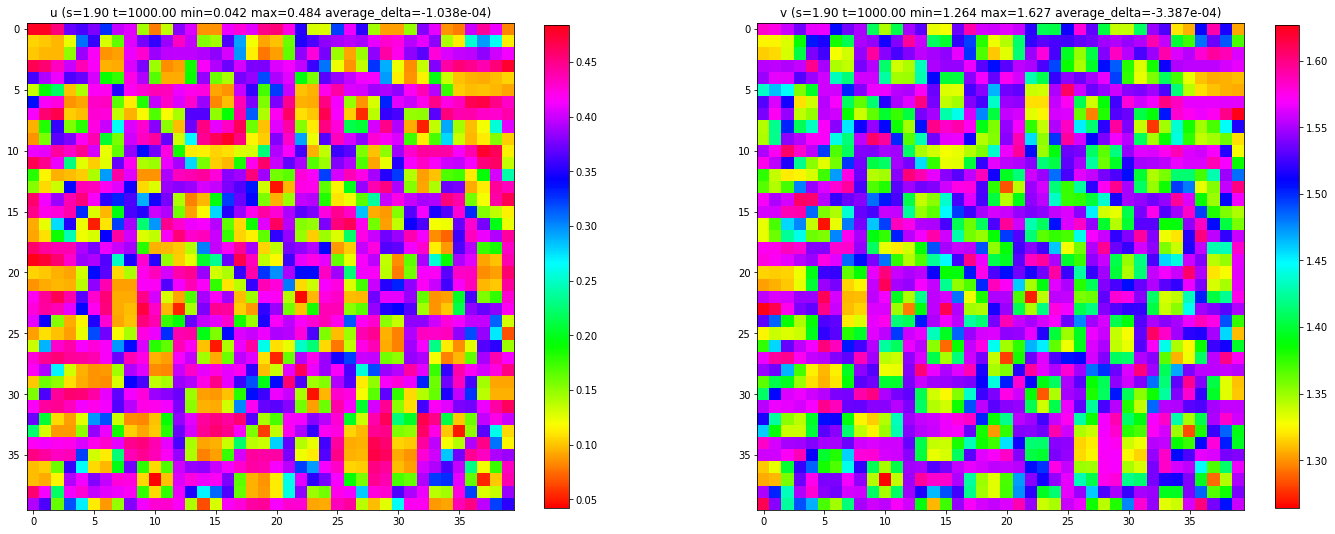

In [ ]:
turing_ground_truth(1.90)

{'N': 40, 'l': 1, 'w': 1, 'alpha': 1, 'beta': 0.3, 'gamma': 0.3, 'b': 0.5, 'c': 0.6, 'm': 0.6, 'q': 0.35, 'd1': 0.015, 'd2': 1, 's': 2.0}


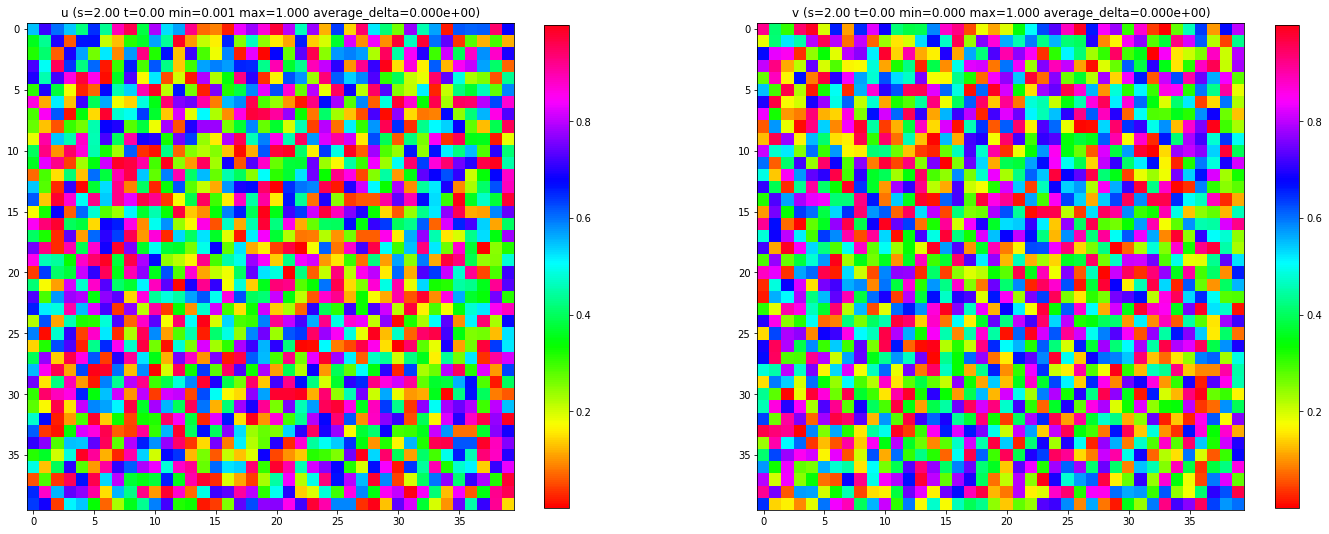

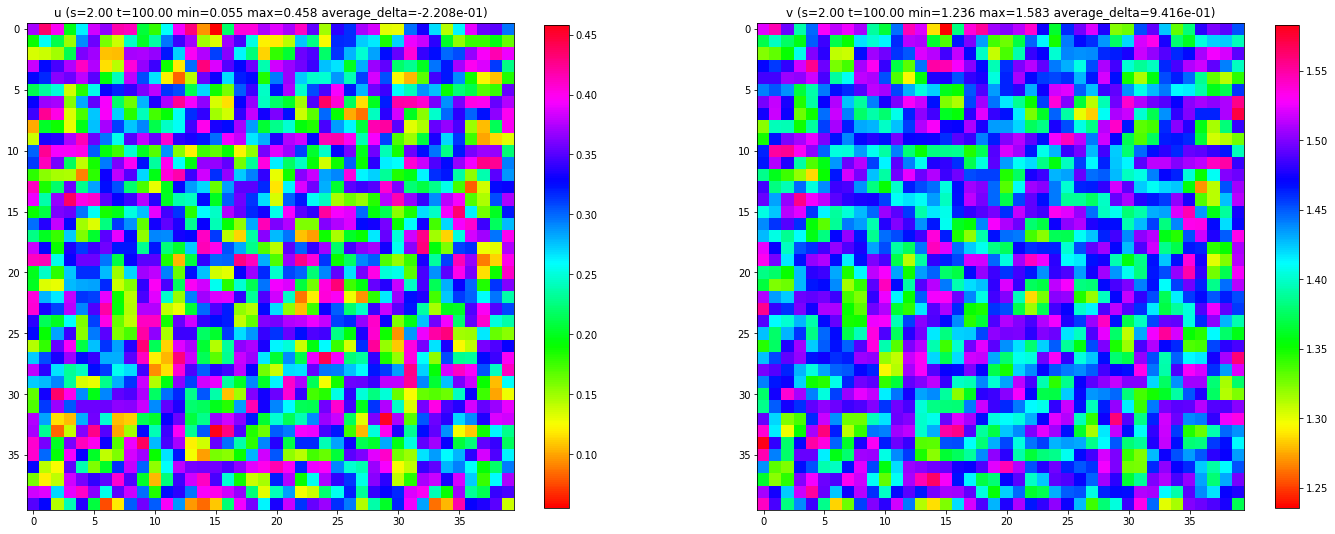

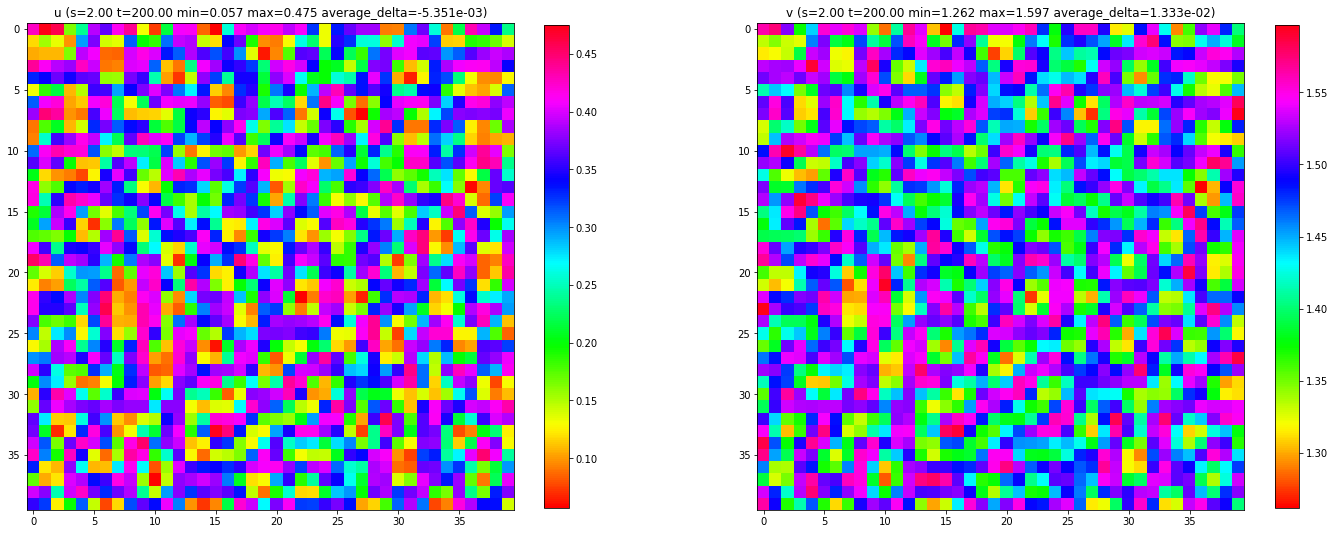

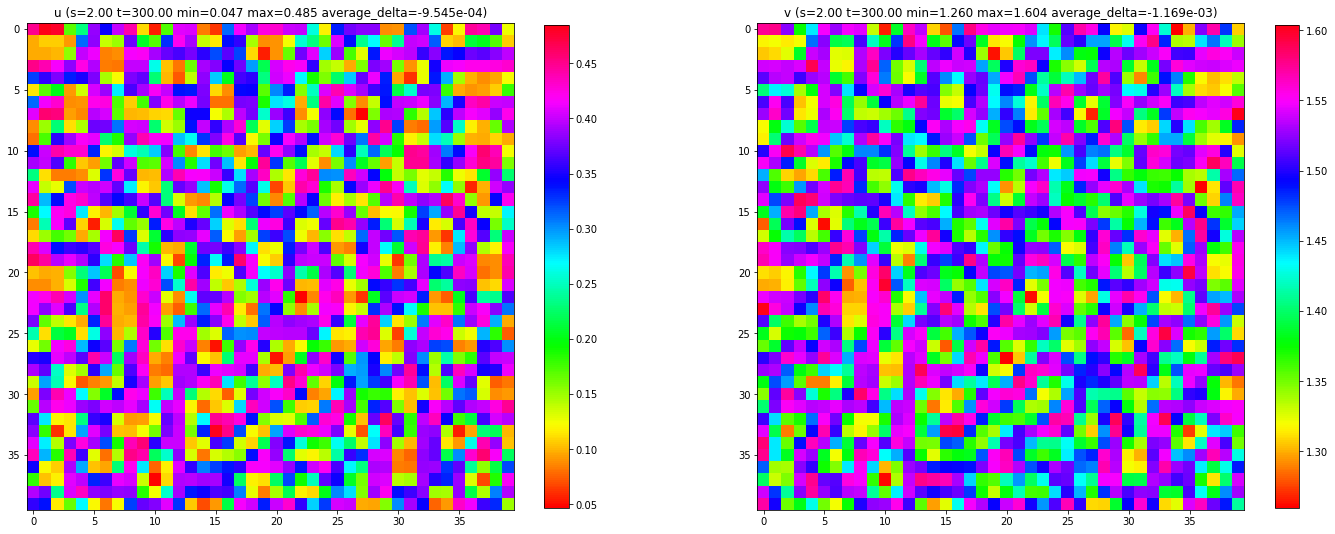

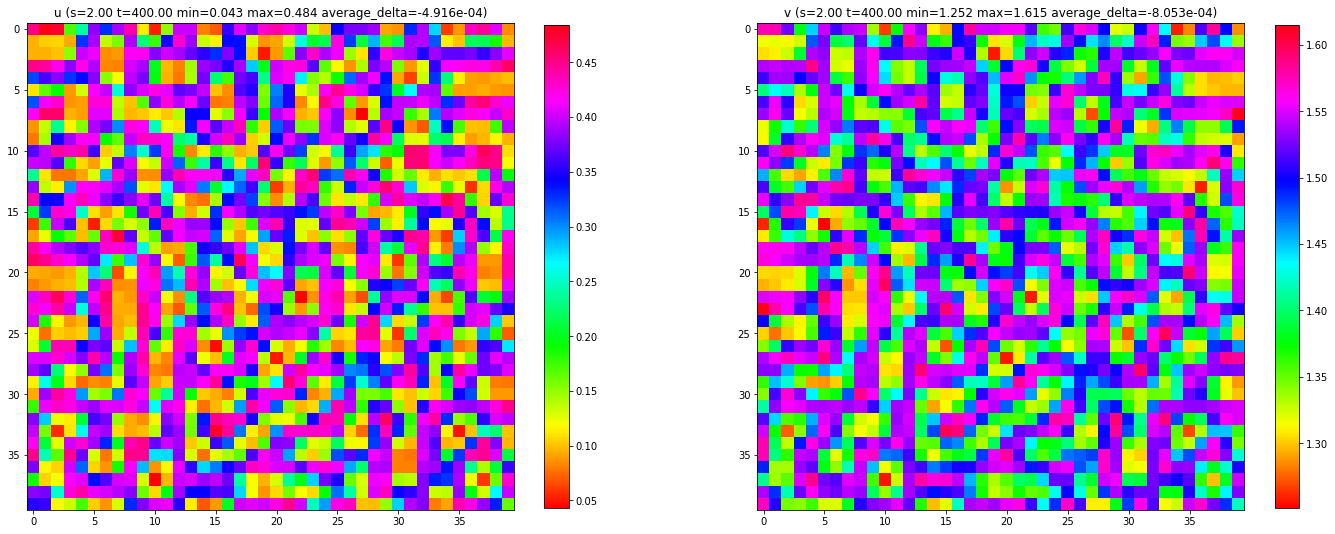

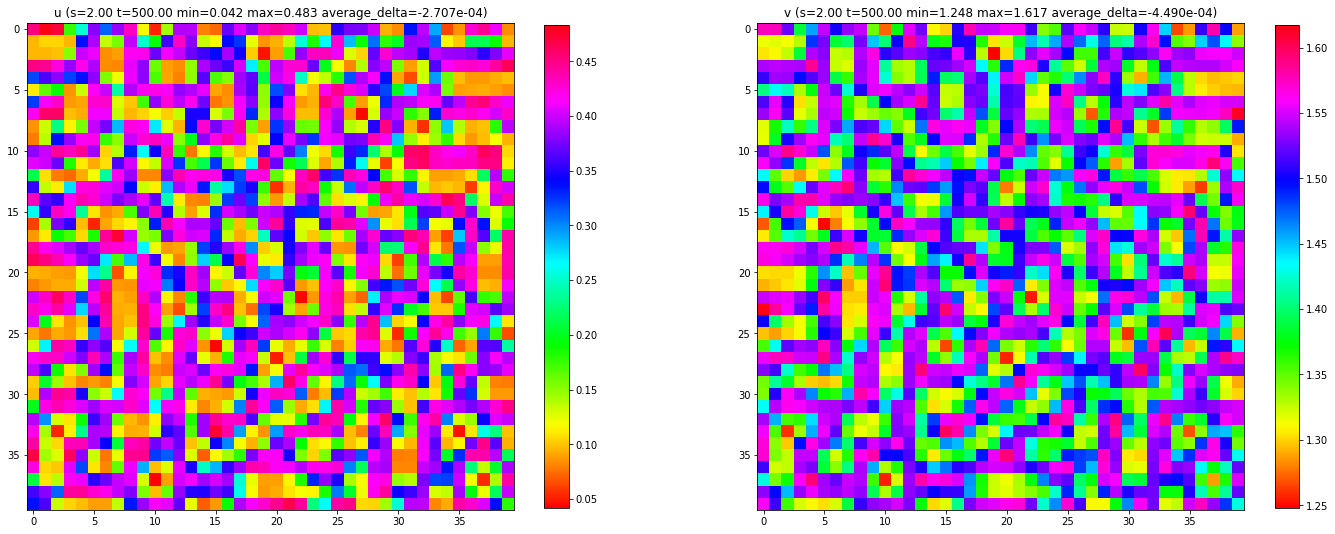

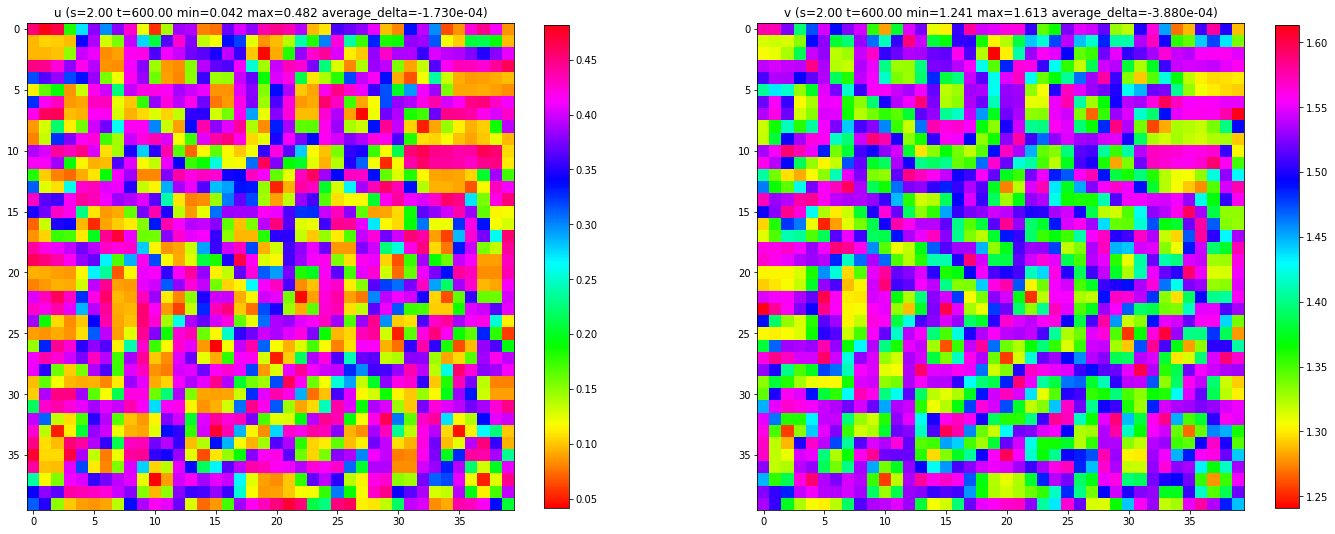

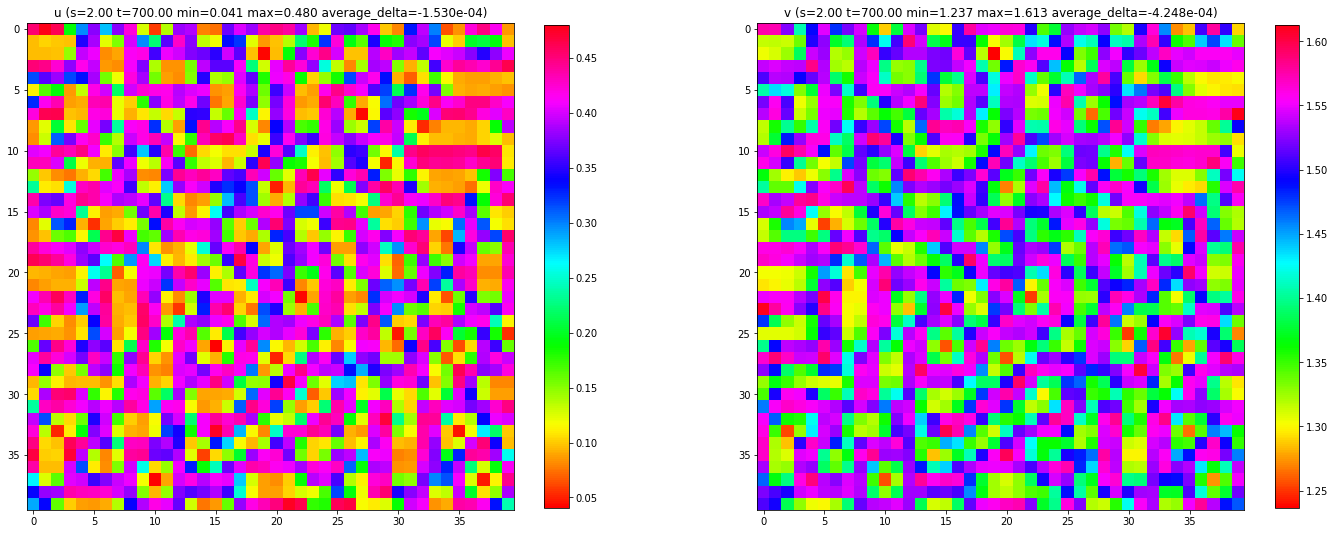

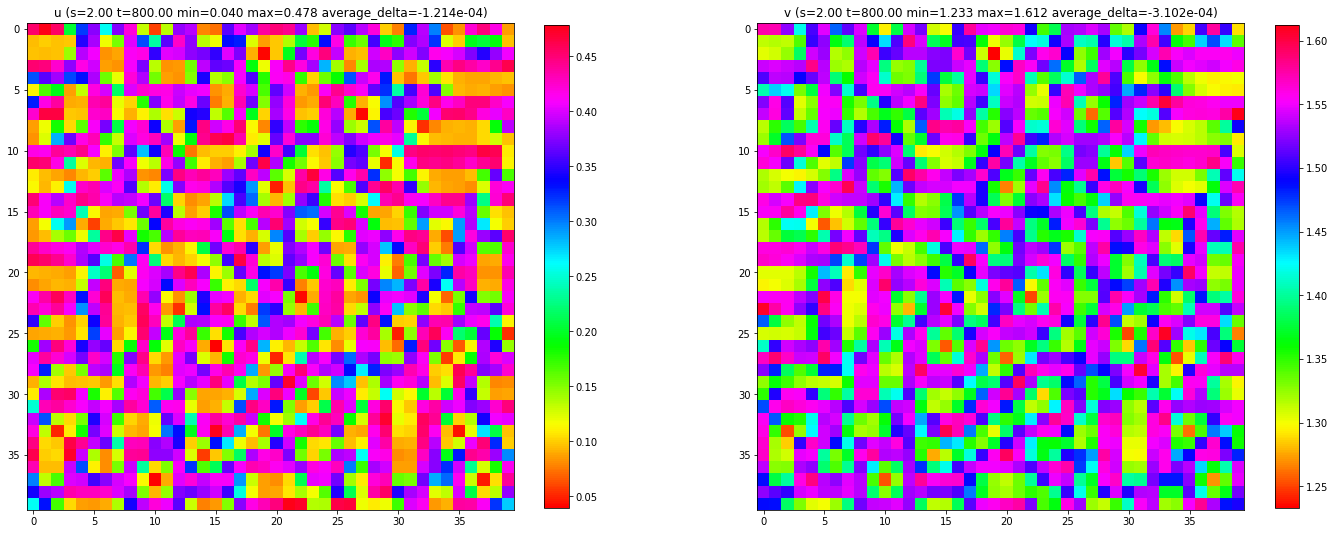

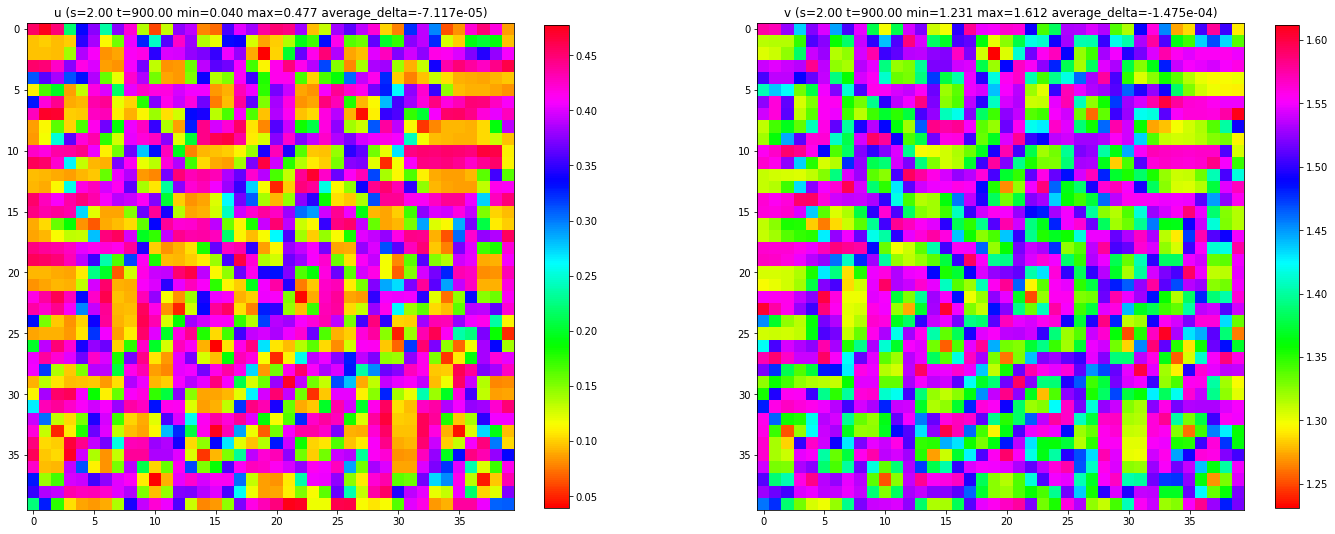

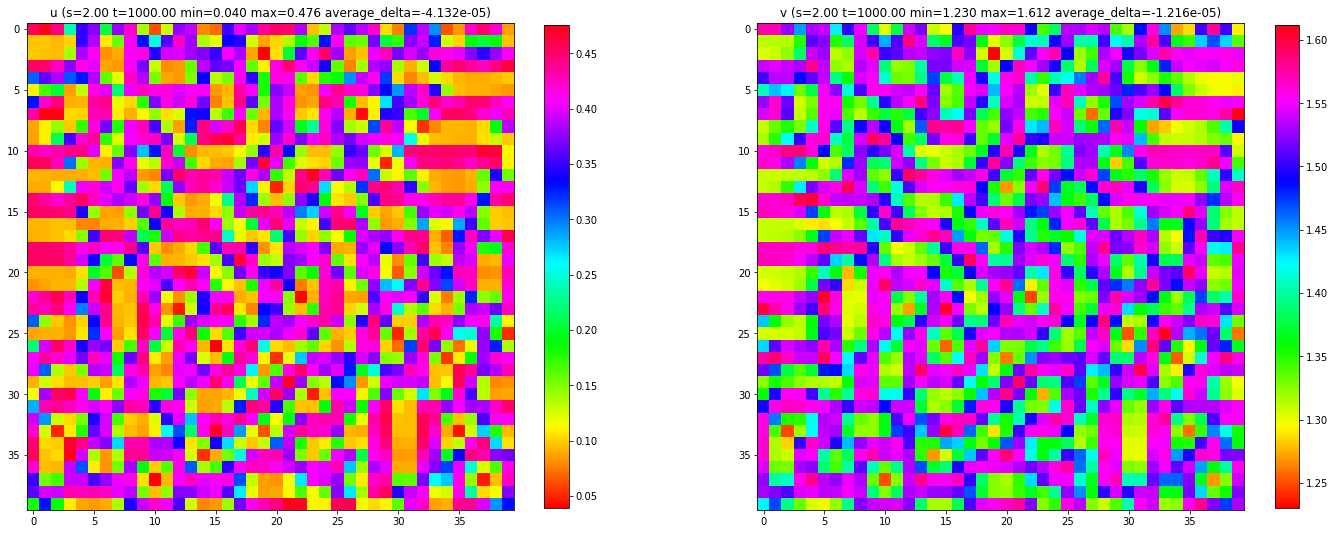

In [ ]:
turing_ground_truth(2.00)

{'N': 40, 'l': 1, 'w': 1, 'alpha': 1, 'beta': 0.3, 'gamma': 0.3, 'b': 0.5, 'c': 0.6, 'm': 0.6, 'q': 0.35, 'd1': 0.015, 'd2': 1, 's': 2.45}


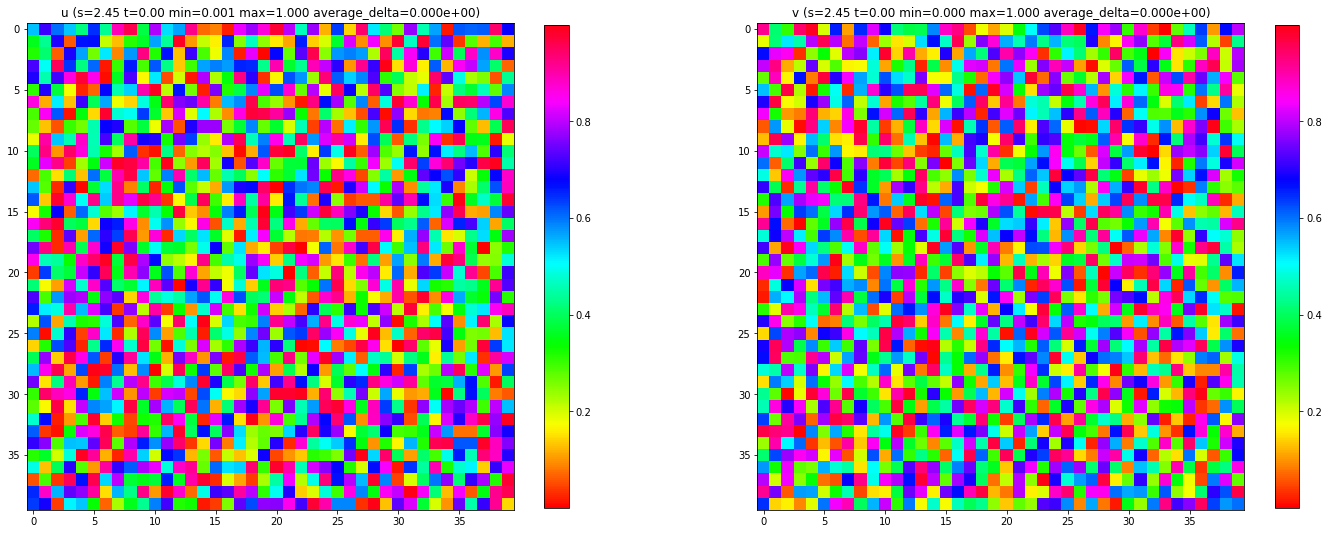

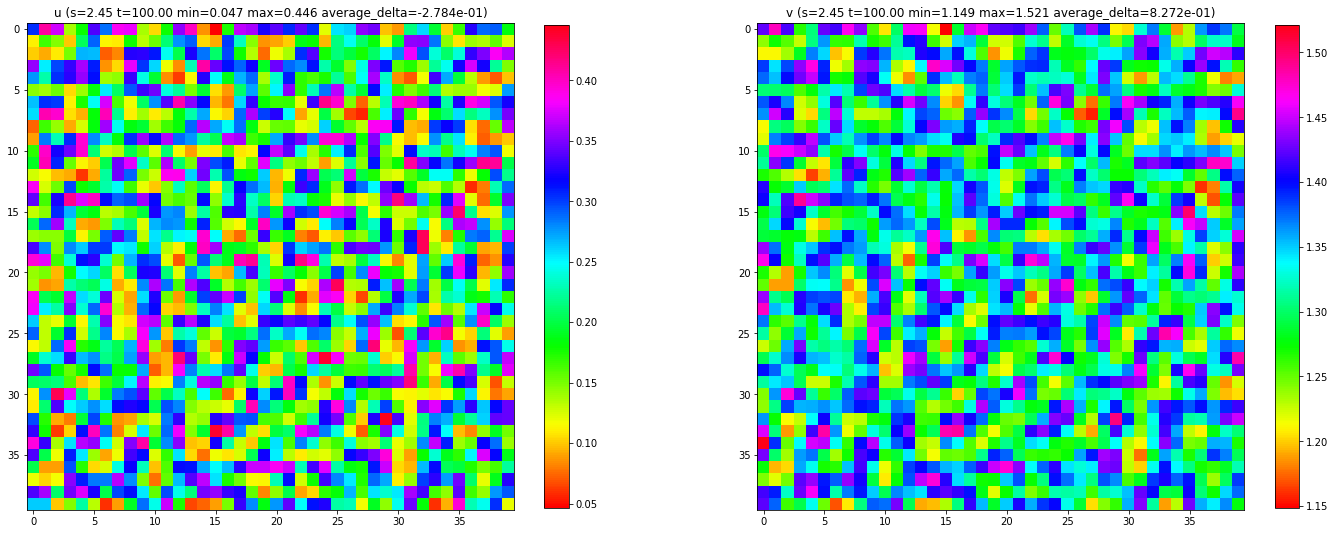

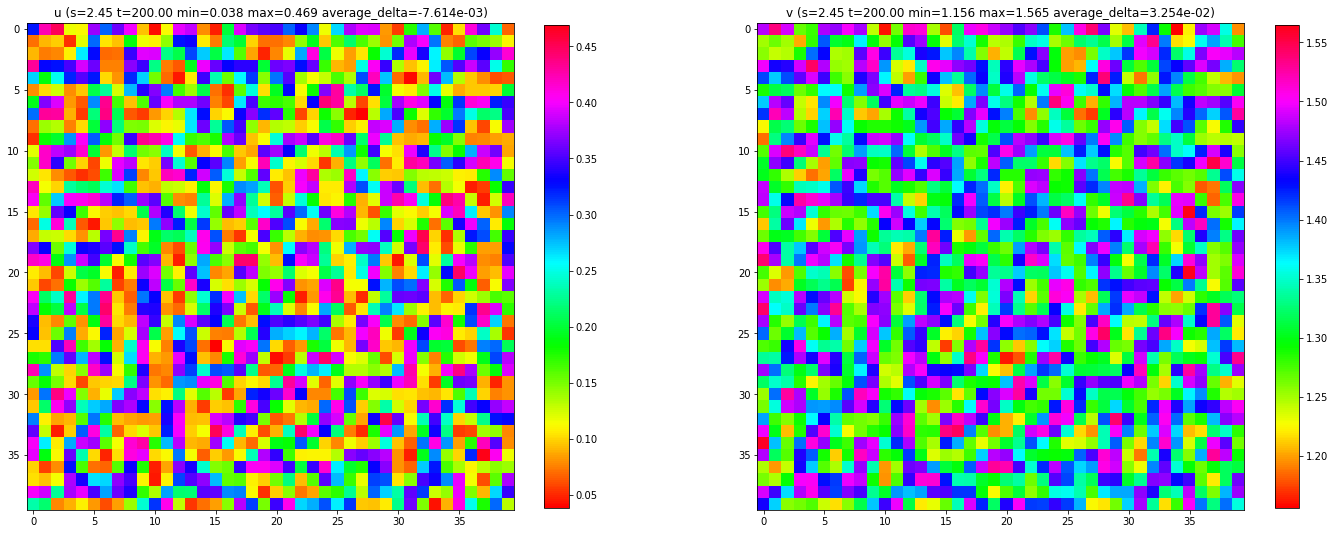

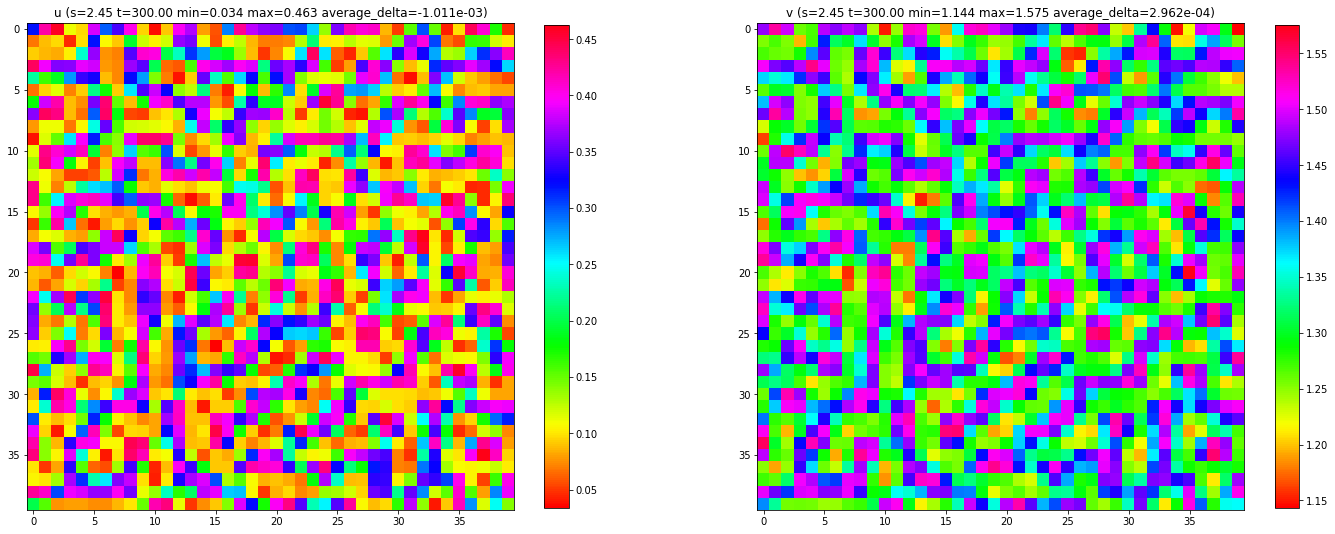

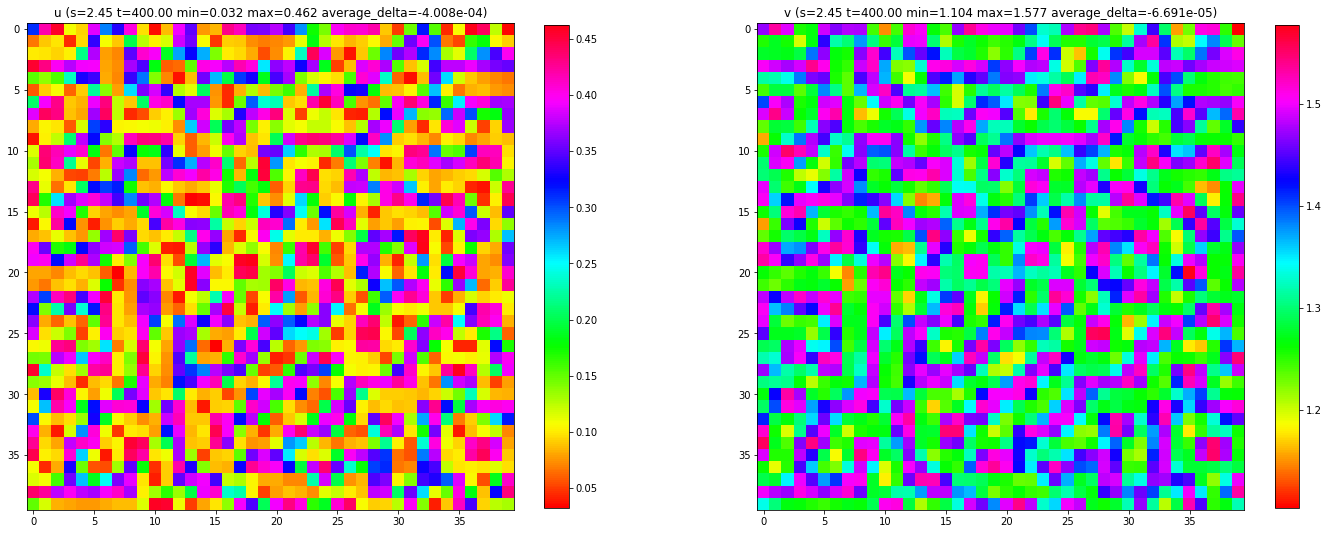

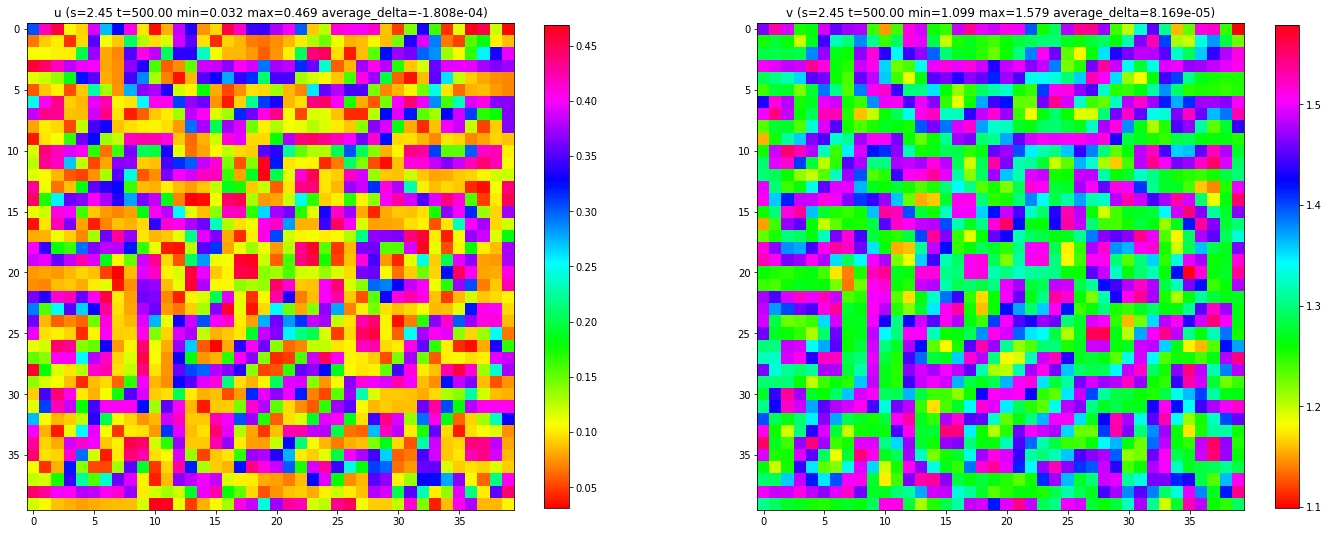

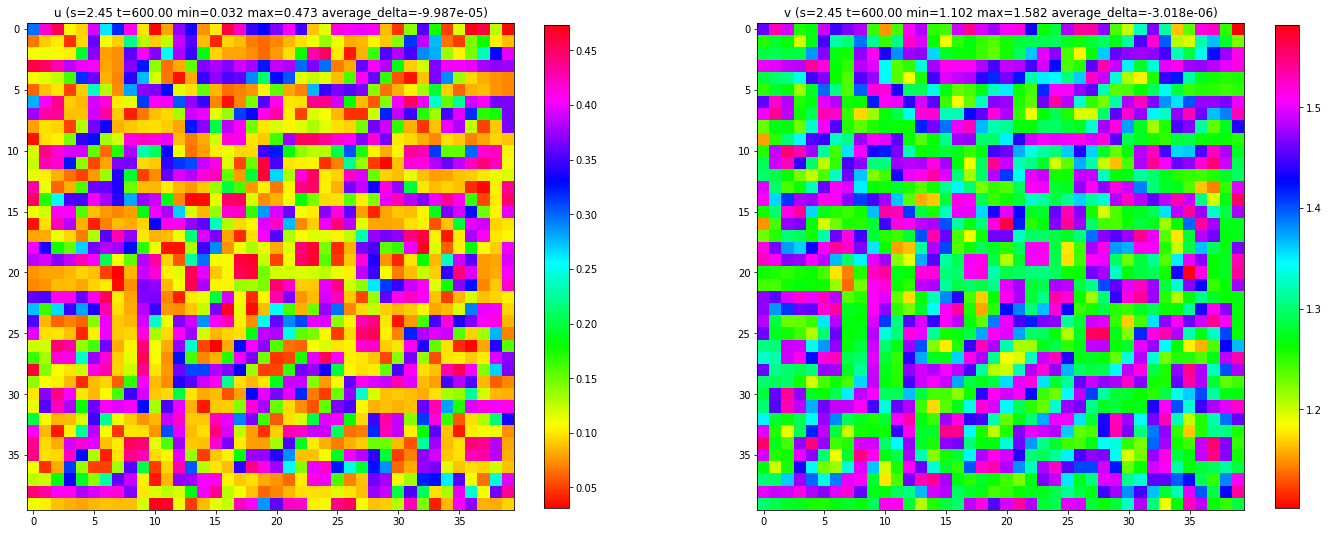

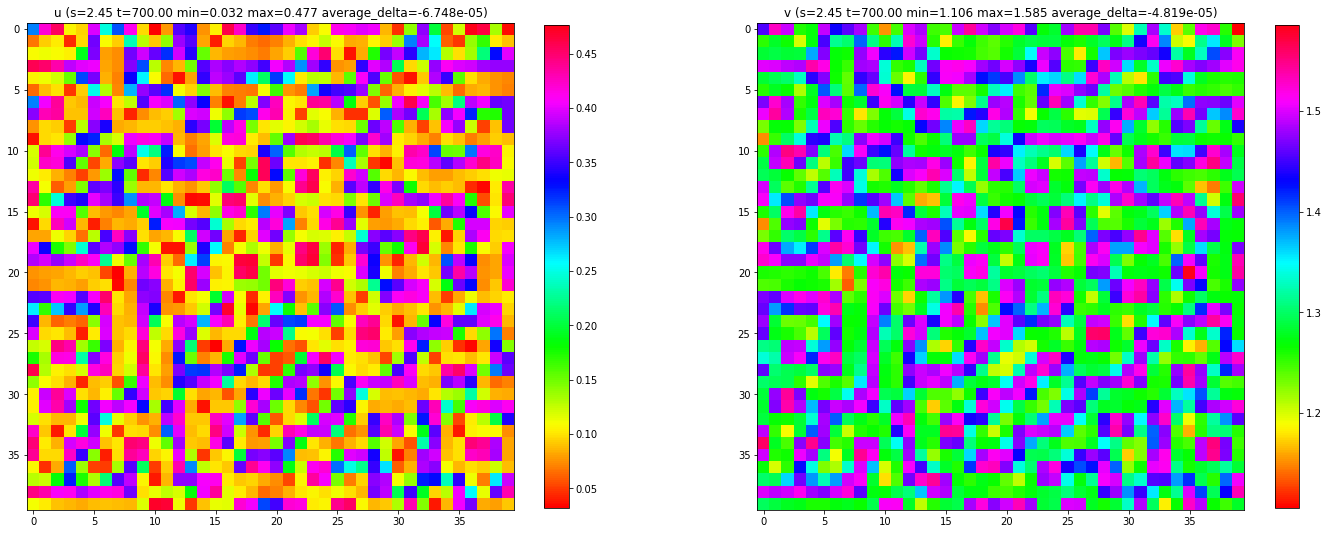

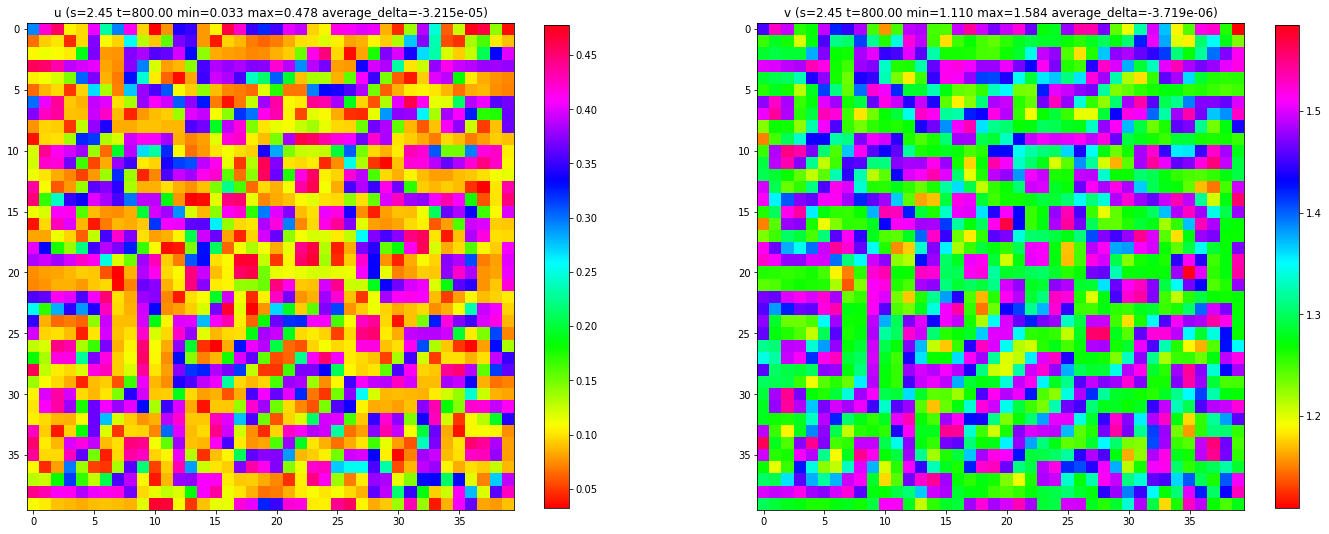

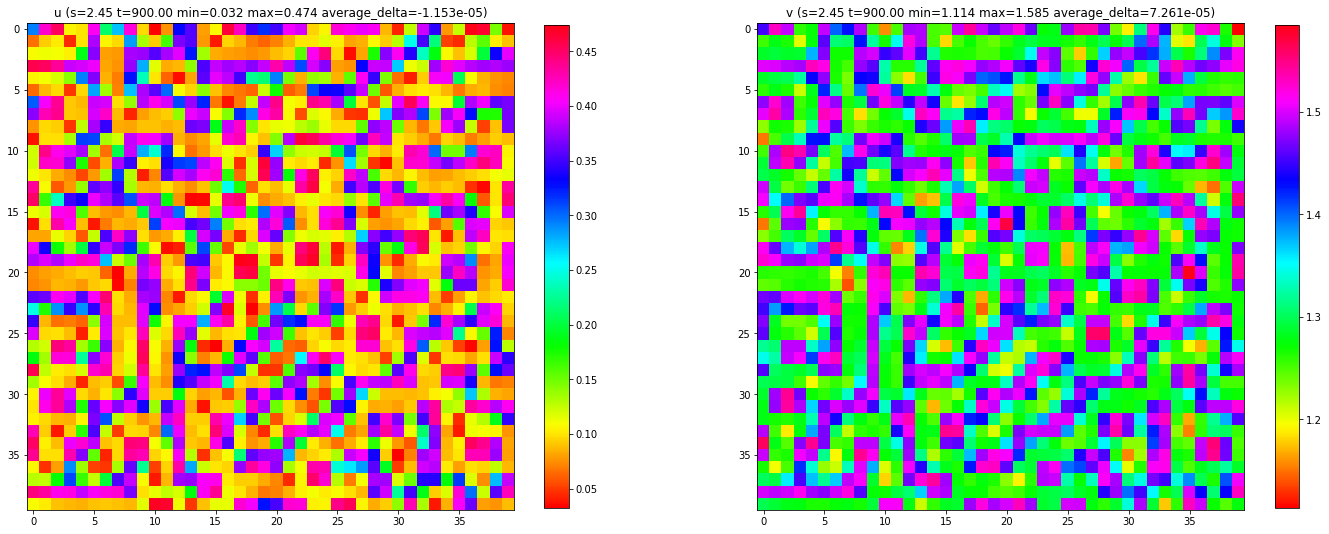

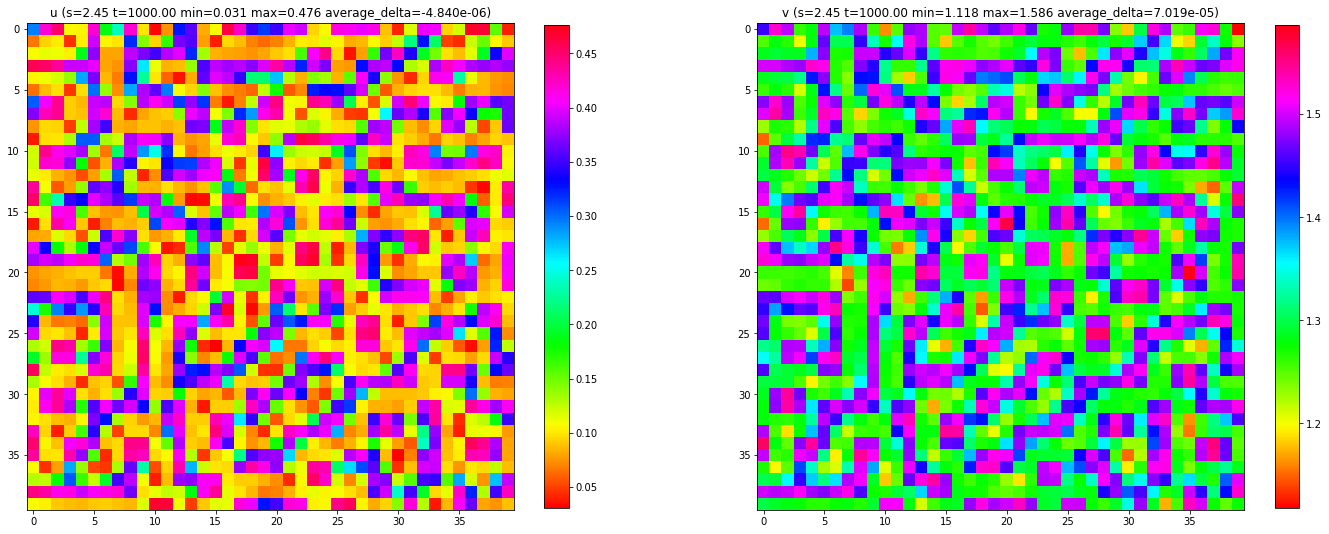

In [ ]:
turing_ground_truth(2.45)

{'N': 40, 'l': 1, 'w': 1, 'alpha': 1, 'beta': 0.3, 'gamma': 0.3, 'b': 0.5, 'c': 0.6, 'm': 0.6, 'q': 0.35, 'd1': 0.015, 'd2': 1, 's': 3.0}


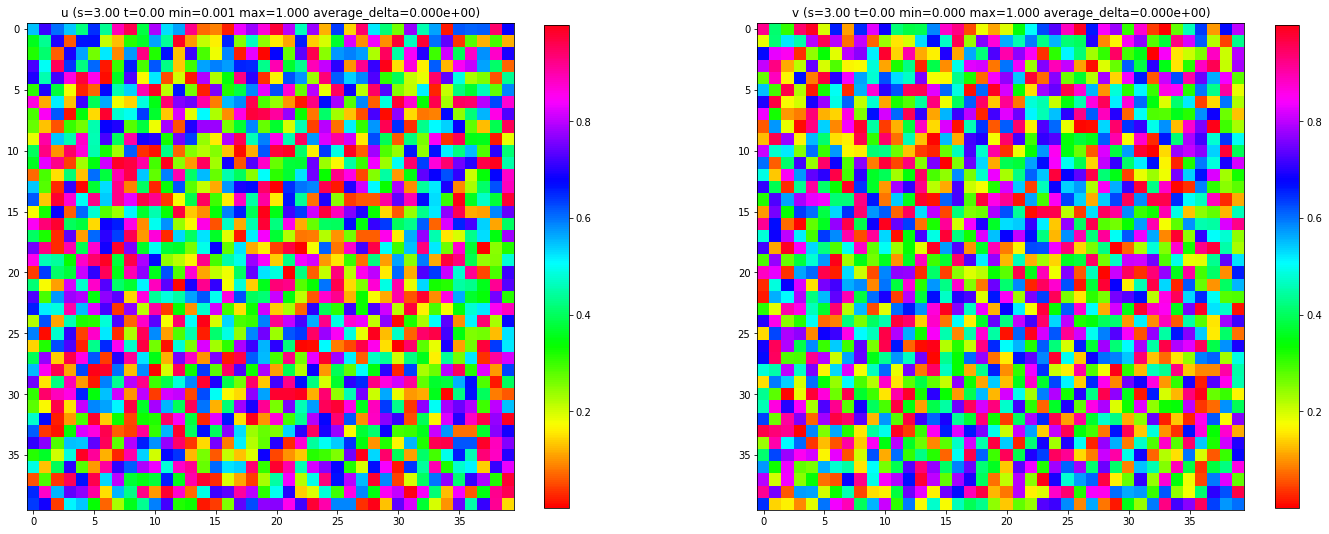

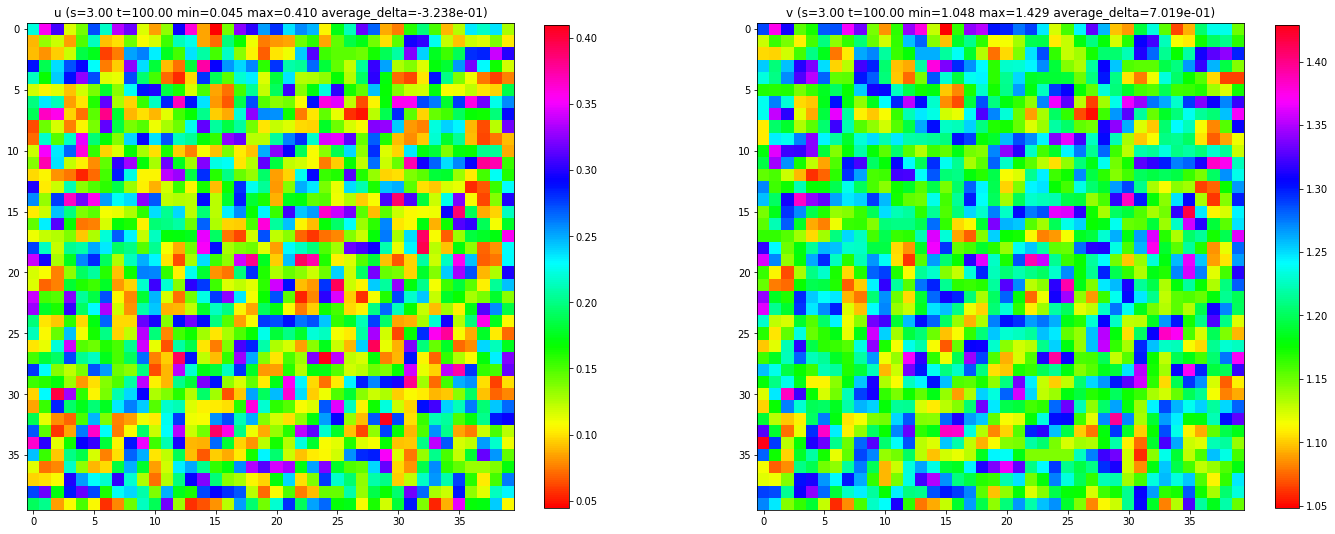

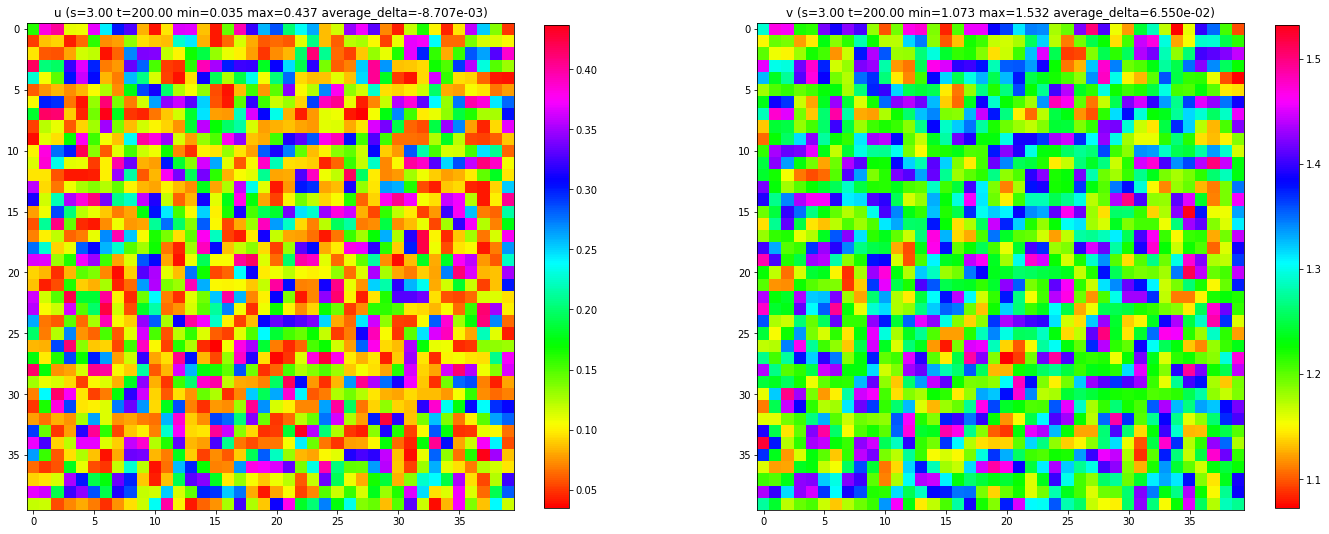

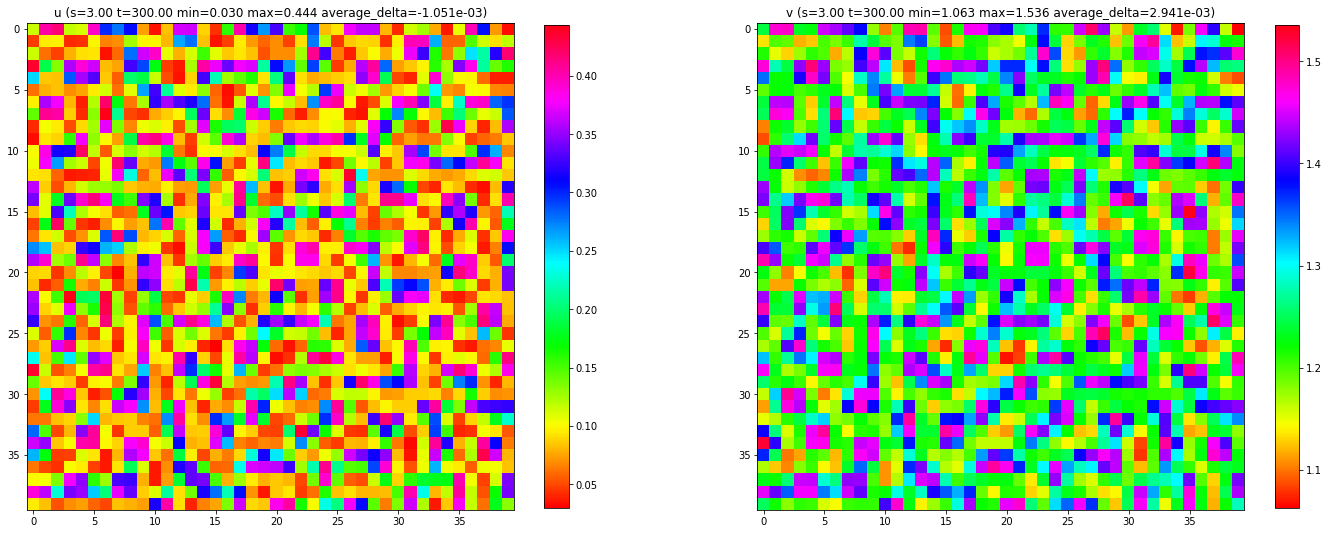

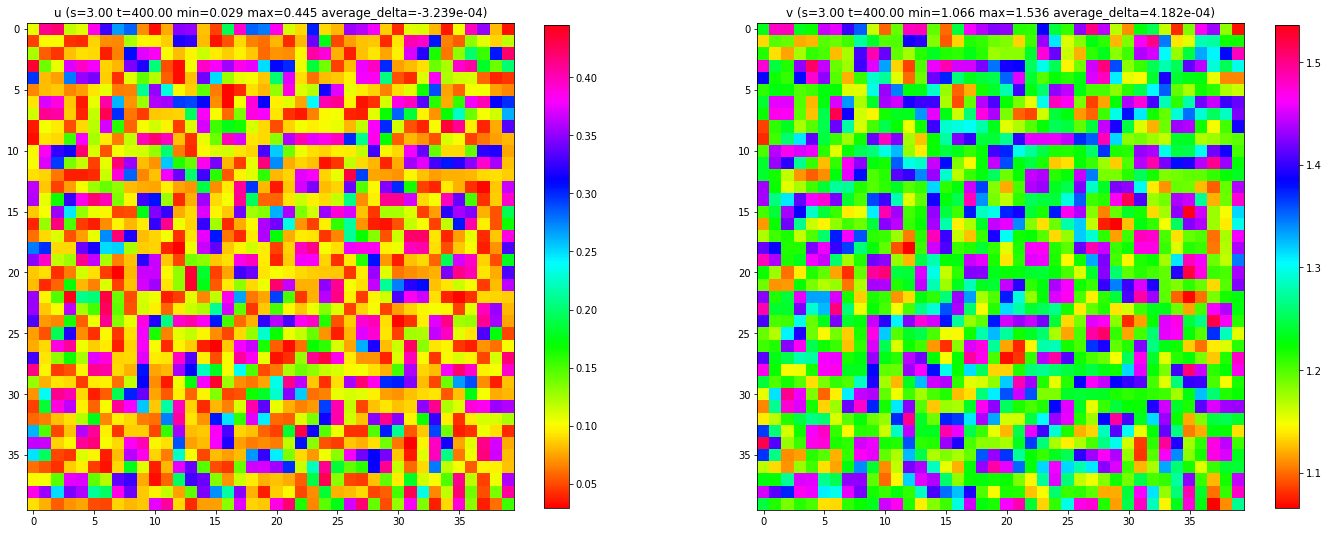

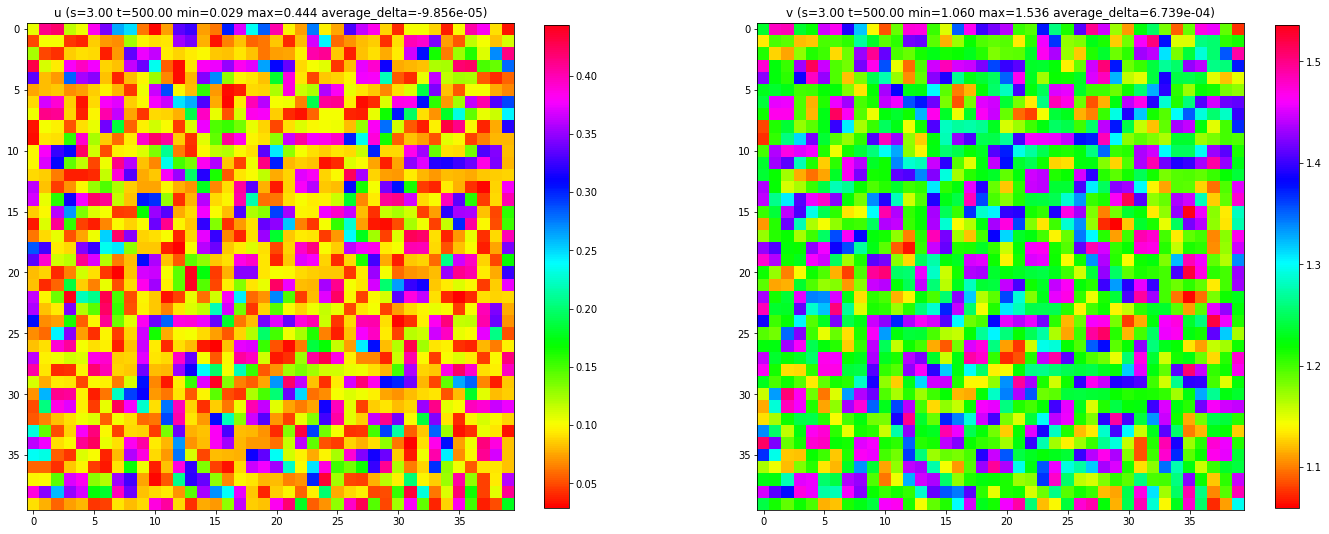

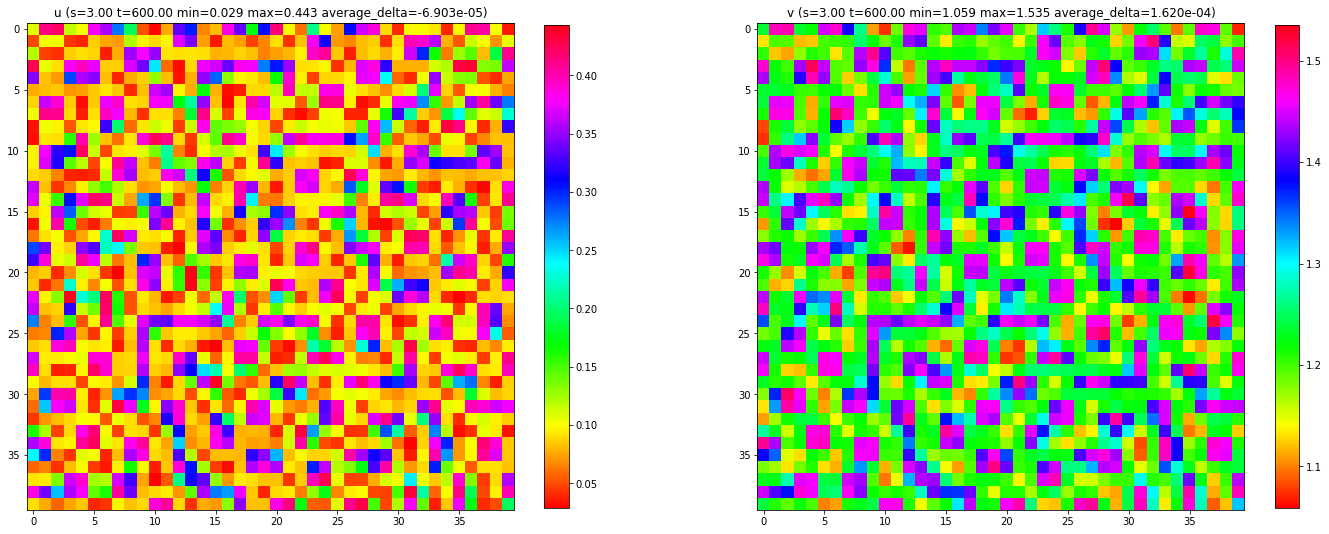

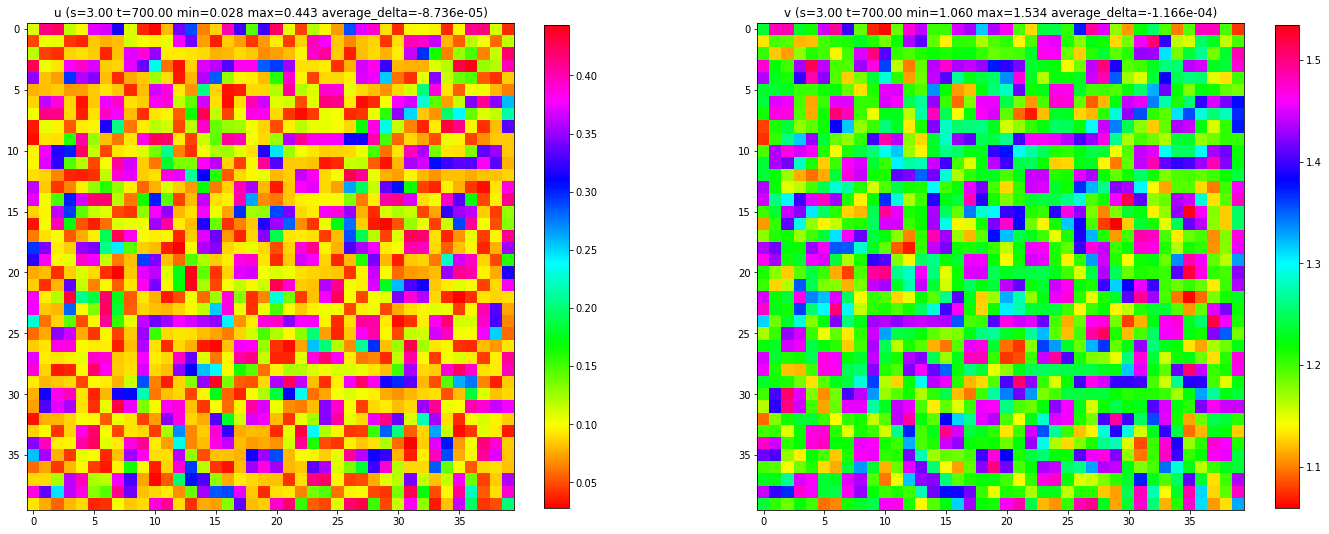

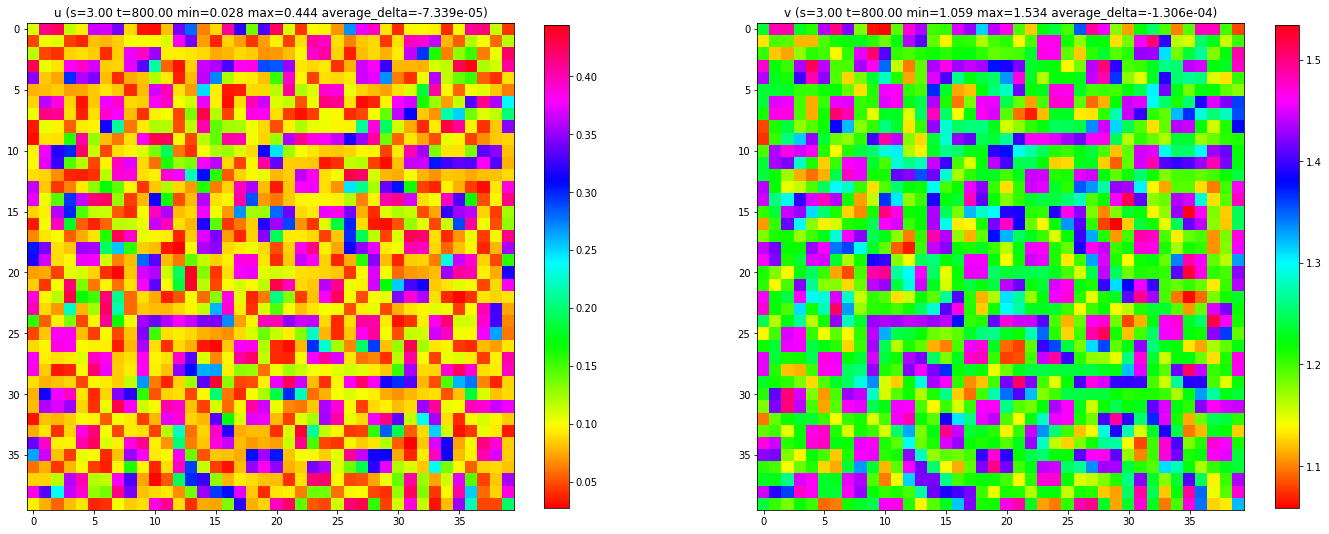

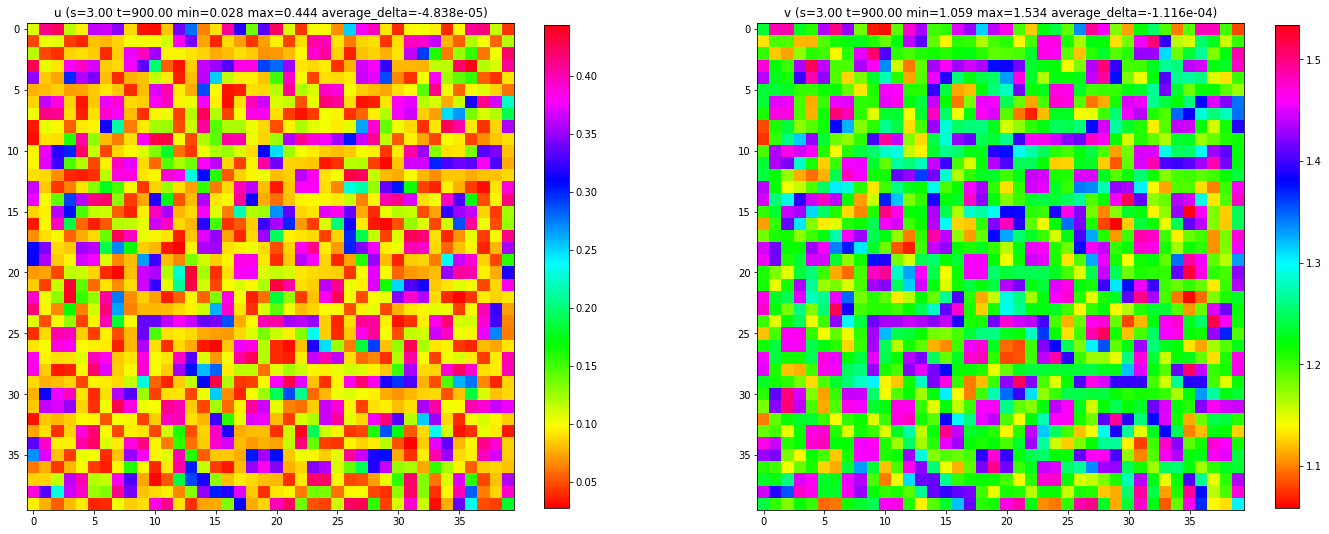

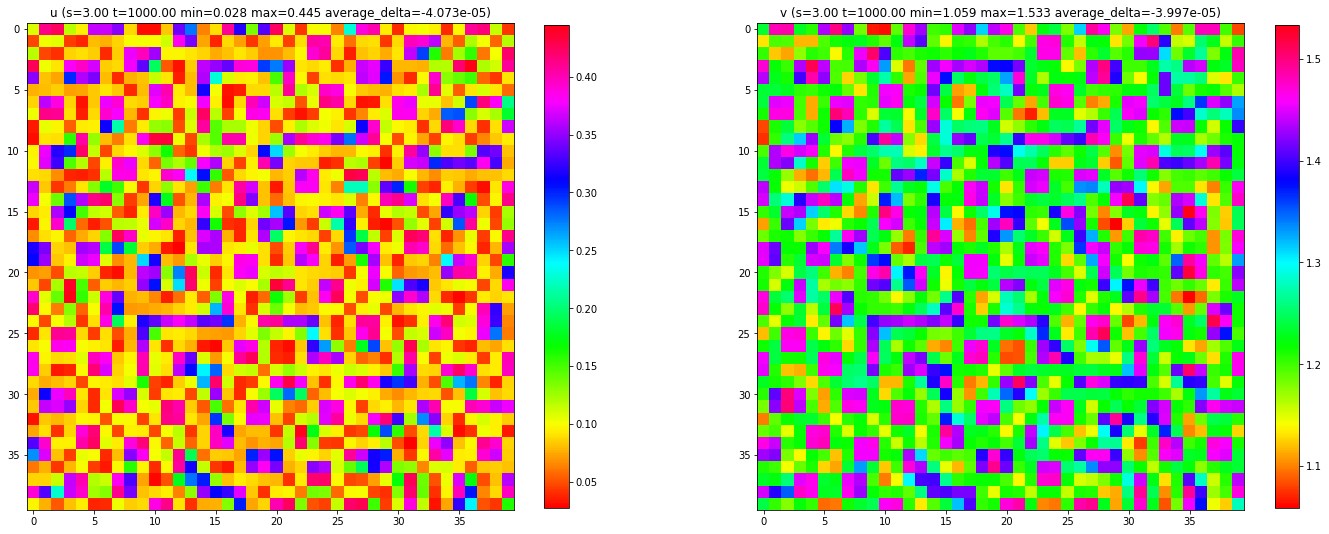

In [ ]:
turing_ground_truth(3.00)

In [ ]:

# T = 100
# T_unit = 0.1
# T_N = int(T / T_unit)
# N = 3
# # x_min, x_max = -100, 100
# l = 1
# # y_min, y_max = -100, 100
# w = 1
# k = -0.05
# tau = 0.1
# du2 = 0.00028
# dv2 = 0.005


def mypend(y, t, k, tau, l, w, du2, dv2):
    u, v = y[:N * N].reshape([N, N]), y[N * N:].reshape([N, N])
    maps = np.asarray([u, v])
    d_reaction = np.asarray([u - u * u * u - v + k, (u - v) / tau])
    d_diffusion = get_diffusion(maps, l, w, du2, dv2, tau)
    dydt = d_reaction + d_diffusion
    print("d_u = ", dydt[0])
    print("d_v = ", dydt[1])
    dydt = np.concatenate([dydt[0].flatten(), dydt[1].flatten()])
    return dydt


u_0 = np.asarray([[1,2,3], [4,5,6], [7,8,9]])
v_0 = np.asarray([[2,4,6], [3,6,9], [4,8,12]])

T = 1
T_unit = 1
T_N = int(T / T_unit)
N = 3
# x_min, x_max = -100, 100
l = 1
# y_min, y_max = -100, 100
w = 1
k = -0.05
tau = 0.1
du2 = 0.00028
dv2 = 0.005


t = np.linspace(0, T, T_N + 1)

y0 = np.concatenate([u_0.flatten(), v_0.flatten()])


res = mypend(y0, None, k, tau, l, w, du2, dv2)

d_u =  [[  -2.04888  -10.04916  -30.04944]
 [ -63.04972 -126.05    -219.05028]
 [-340.05056 -512.05084 -732.05112]]
d_v =  [[ -9.85 -19.9  -29.95]
 [ 10.15 -10.   -30.15]
 [ 30.15  -0.1  -30.35]]


In [ ]:
import numpy as np
a = np.asarray([[1,2,3], [4,5,6], [7,8,9]])
b = np.asarray([[2,4,6], [1,5,9], [3,2,1]])

print("a = \n", a)
print("b = \n", b)
# b = np.roll(a, 1, axis=1)
# b[:, 0:1] = a[:, 0:1]
# print(b)
y_0 = np.asarray([a, b])

def get_partial(maps, l, w, du2, dv2):
  u_input, v_input = maps[0], maps[1]

  u_from_left = np.roll(u_input, 1, axis=1)
  u_from_left[:, :1] = u_input[:, :1]
  u_from_right = np.roll(u_input, -1, axis=1)
  u_from_right[:, -1:] = u_input[:, -1:]
  u_from_top = np.roll(u_input, 1, axis=0)
  u_from_top[:1, :] = u_input[:1, :]
  u_from_bottom = np.roll(u_input, -1, axis=0)
  u_from_bottom[-1:, :] = u_input[-1:, :]

  v_from_left = np.roll(v_input, 1, axis=1)
  v_from_left[:, :1] = v_input[:, :1]
  v_from_right = np.roll(v_input, -1, axis=1)
  v_from_right[:, -1:] = v_input[:, -1:]
  v_from_top = np.roll(v_input, 1, axis=0)
  v_from_top[:1, :] = v_input[:1, :]
  v_from_bottom = np.roll(v_input, -1, axis=0)
  v_from_bottom[-1:, :] = v_input[-1:, :]

  u_partial = ((u_from_left + u_from_right - u_input * 2) / (l ** 2) + (u_from_top + u_from_bottom - u_input * 2) / (w ** 2)) * du2
  v_partial = ((v_from_left + v_from_right - v_input * 2) / (l ** 2) + (v_from_top + v_from_bottom - v_input * 2) / (w ** 2)) * dv2
  return np.asarray([u_partial, v_partial])

get_partial(y_0, 1, 1, 1, 1)

a = 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
b = 
 [[2 4 6]
 [1 5 9]
 [3 2 1]]
[[ 4.  3.  2.]
 [ 1.  0. -1.]
 [-2. -3. -4.]]
[[  1.   1.   1.]
 [  7.  -4. -15.]
 [ -3.   3.   9.]]


In [ ]:
import torch

input = torch.Tensor([1,2,3,4,5,6])
print(input)
u, v = input[:3], input[3:]
print(u.shape, v.shape)
print(u, v)
u = u.reshape([1, 3])
v = v.reshape([1, 3])
print(u.shape, v.shape)
print(u, v)

t_list = [u, v]

print(torch.cat(tuple(item for item in t_list), 1))

output = torch.cat((u, v), 1)
print(output[0])

tensor([1., 2., 3., 4., 5., 6.])
torch.Size([3]) torch.Size([3])
tensor([1., 2., 3.]) tensor([4., 5., 6.])
torch.Size([1, 3]) torch.Size([1, 3])
tensor([[1., 2., 3.]]) tensor([[4., 5., 6.]])
tensor([[1., 2., 3., 4., 5., 6.]])
tensor([1., 2., 3., 4., 5., 6.])


In [ ]:
import numpy as np
u = np.asarray([1,2,3])
v = np.asarray([4,5,6])
x = np.concatenate([u, v])
print(x)

[1 2 3 4 5 6]


In [ ]:
import torch
u = torch.Tensor([[1,2,3,4], [5,6,7,8]])
u_from_left = torch.roll(u, 1, 1)
u_from_left[:, :1] = u[:, :1]
u_from_right = torch.roll(u, -1, 1)
u_from_right[:, -1:] = u[:, -1:]
print(u_from_left)
print(u_from_right)

tensor([[1., 1., 2., 3.],
        [5., 5., 6., 7.]])
tensor([[2., 3., 4., 4.],
        [6., 7., 8., 8.]])


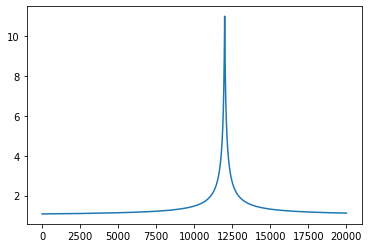

<Figure size 432x288 with 0 Axes>

In [ ]:
import torch
# Simulation - Lorenz

import numpy as np
import matplotlib.pyplot as plt
T = 20
T_unit = 0.001
T_N = int(T / T_unit)

c = 12

x = [i for i in range(T_N)]
y = [1.0 + 1.0 / (np.abs(item * T_unit - c) + 0.1) for item in x]
# y = [0.5] * 10000 + [10] * 4000 + [0.5] * 6000

plt.plot(x, y)
plt.show()
plt.clf()

<class 'numpy.ndarray'>
(10000,)


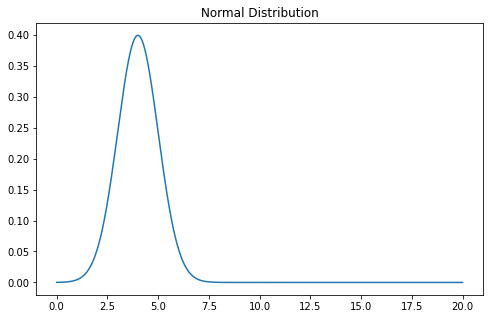

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
mu = 4
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(0, 20, 10000)
y = stats.norm.pdf(x, mu, sigma)
print(type(y))
print(y.shape)

plt.subplots(figsize=(8, 5))
plt.plot(x, y)
plt.title("Normal Distribution")
plt.show()

offset = 0.6
avg = 1.0000000000000002
min = 0.20000004861103127, max = 3.3917987488772026
max / min = 16.958989622416137


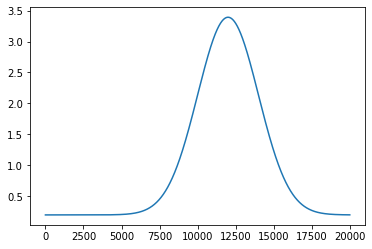

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
def generate_normal_distribution_weight(length, width, mu_location):
  mu = mu_location * length
  sigma = length // 10
  x = np.linspace(0, length, length)
  y = 1e2 * length * stats.norm.pdf(x, mu, sigma)
  y = y / y.sum() * length * 0.8 + 0.2
  # print(y)

  # plt.plot(x, y)
  # print(x[:5], x[-5:])
  # print(y.shape)
  # print(y)
  # plt.show()
  res = np.column_stack([y for i in range(width)])
  # print(res.shape)
  return res

offset = 0.6
weight = generate_normal_distribution_weight(20000, 2, offset)
one_y = [item[0] for item in weight]
one_y = np.asarray(one_y)
plt.plot(one_y)
# print(one_y)
print("offset = {}".format(offset))
print("avg = {}".format(one_y.mean()))
print("min = {}, max = {}".format(one_y.min(), one_y.max()))
print("max / min = {}".format(one_y.max() / one_y.min()))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
def generate_normal_distribution_weight_normal(length, width, epoch, epoch_freeze=500000, epoch_step=50000, freeze_range=0.25):
  if epoch <= epoch_freeze:
    weight_range = [0, freeze_range * length]
  else:
    weight_range = [0, (((epoch - epoch_freeze) % epoch_step) / epoch_step * (1 - freeze_range) + freeze_range) * length]
  weight_high = length * 1 / (weight_range[1] - weight_range[0])
  y = [weight_high if i < weight_range[1] else 0 for i in range(length)]
  y = np.asarray(y)
  y = y * 0.8 + 0.2
  # print("weight range = {}".format(weight_range))
  x = np.linspace(0, length, length)
  plt.plot(x, y)
  plt.show()
  plt.clf()
  plt.close()

  # mu = mu_location * length
  # sigma = length // 10
  # x = np.linspace(0, length, length)
  # y = 1e2 * length * stats.norm.pdf(x, mu, sigma)
  # y = y / y.sum() * length * 0.8 + 0.2
  # print(y)
  # plt.plot(x, y)
  # print(x[:5], x[-5:])
  # print(y.shape)
  # print(y)
  # plt.show()
  res = np.column_stack([y for i in range(width)])
  # print(res.shape)
  return res

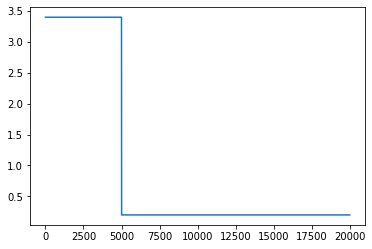

avg = 1.00
min = 0.20, max = 3.40
max / min = 17.00


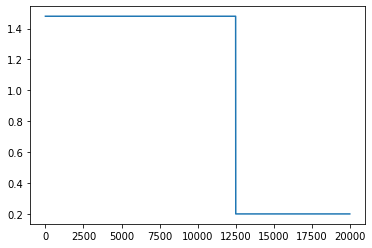

avg = 1.00
min = 0.20, max = 1.48
max / min = 7.40


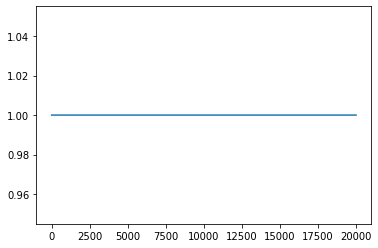

avg = 1.00
min = 1.00, max = 1.00
max / min = 1.00


In [ ]:
res = generate_normal_distribution_weight_normal(20000, 2, 500000)
one_y = res[:, 0:1]
print("avg = {0:.2f}".format(one_y.mean()))
print("min = {0:.2f}, max = {1:.2f}".format(one_y.min(), one_y.max()))
print("max / min = {0:.2f}".format(one_y.max() / one_y.min()))

res = generate_normal_distribution_weight_normal(20000, 2, 525000)
one_y = res[:, 0:1]
print("avg = {0:.2f}".format(one_y.mean()))
print("min = {0:.2f}, max = {1:.2f}".format(one_y.min(), one_y.max()))
print("max / min = {0:.2f}".format(one_y.max() / one_y.min()))


res = generate_normal_distribution_weight_normal(20000, 2, 549999)
one_y = res[:, 0:1]
print("avg = {0:.2f}".format(one_y.mean()))
print("min = {0:.2f}, max = {1:.2f}".format(one_y.min(), one_y.max()))
print("max / min = {0:.2f}".format(one_y.max() / one_y.min()))

In [ ]:
a = np.asarray([1,2,3])

np.column_stack([a for i in range(10)])

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def generate_normal_distribution_weight_normal(length, width, epoch, epoch_max, epoch_freeze=0.15, epoch_moving=0.05, epoch_final=0.40):
  epoch_ratio = epoch / epoch_max
  if epoch_ratio <= epoch_freeze:
    weight_range = [0, 0.25 * length]
  elif epoch_freeze < epoch_ratio <= epoch_freeze + epoch_moving:
    weight_range = [0, (0.25 + (epoch_ratio - (1 * epoch_freeze)) / epoch_moving * 0.25) * length]
  elif epoch_freeze + epoch_moving < epoch_ratio <= 2 * epoch_freeze + epoch_moving:
    weight_range = [0, 0.5 * length]
  elif 2 * epoch_freeze + epoch_moving < epoch_ratio <= 2 * epoch_freeze + 2 * epoch_moving:
    weight_range = [0, (0.5 + (epoch_ratio - (2 * epoch_freeze + epoch_moving)) / epoch_moving * 0.25) * length]
  elif 2 * epoch_freeze + 2 * epoch_moving < epoch_ratio <= 3 * epoch_freeze + 2 * epoch_moving:
    weight_range = [0, 0.75 * length]
  elif 3 * epoch_freeze + 2 * epoch_moving < epoch_ratio <= 3 * epoch_freeze + 3 * epoch_moving:
    weight_range = [0, (0.75 + (epoch_ratio - (3 * epoch_freeze + 2 * epoch_moving)) / epoch_moving * 0.25) * length]
  elif 3 * epoch_freeze + 3 * epoch_moving < epoch_ratio <= 1.0:
    weight_range = [0, 1.0 * length]

  weight_high = length * 1 / (weight_range[1] - weight_range[0])
  y = [weight_high if i < weight_range[1] else 0 for i in range(length)]
  y = np.asarray(y)
  y = y / y.sum() * length
  # print("weight range = {}".format(weight_range))
  # x = np.linspace(0, length, length)
  # plt.plot(x, y)
  # plt.show()

  # mu = mu_location * length
  # sigma = length // 10
  # x = np.linspace(0, length, length)
  # y = 1e2 * length * stats.norm.pdf(x, mu, sigma)
  # y = y / y.sum() * length * 0.8 + 0.2
  # print(y)
  # plt.plot(x, y)
  # print(x[:5], x[-5:])
  # print(y.shape)
  # print(y)
  # plt.show()
  res = np.column_stack([y for i in range(width)])
  # print(res.shape)
  return res


res = generate_normal_distribution_weight_normal(20000, 2, 240000, 400000)

-0.009850000000000001


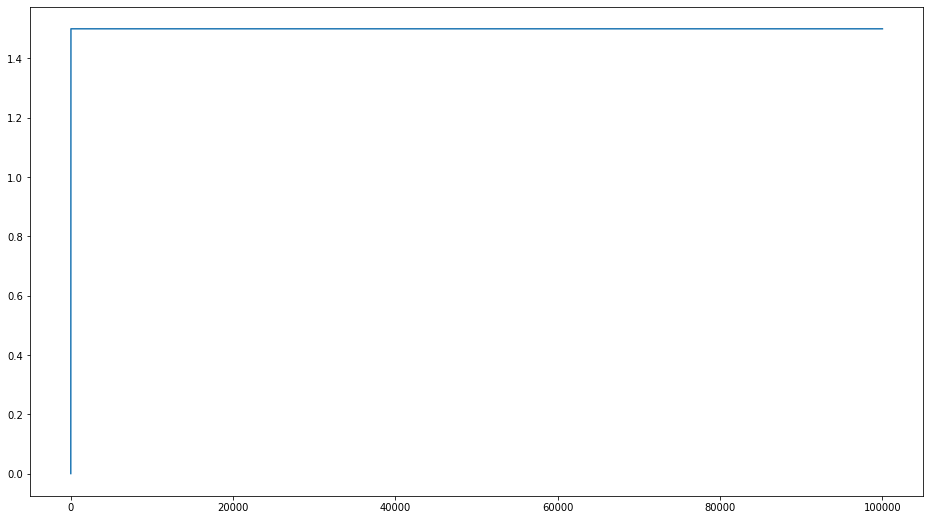

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.special
length=10000
x = np.linspace(0, 99999, length)

def func(x):
  return 5e-2 * x + (- (1.0 / (5e-2 * x + 1e-4)) + 1e4) / 1e5

def func2(x):
  return 1.0 + x - math.e ** (-1e2*x)

def W(x):
  return scipy.special.lambertw(x).real

def W2(x):
  return 1.5 * (1 - math.e ** (-x))

def func3(x):
  return 0.0001 * (W2(100 * math.e ** (100 - 10000 * x)) + 10000 * x - 100)
  # return 100 * float(scipy.special.lambertw(0.01 * math.e ** (-0.01 * x)).real) + x - 1.0

plt.figure(figsize=(16, 9))
y = [W2(item) for item in x]
plt.plot(x, y)
print(func3(0))

In [17]:
a = scipy.special.lambertw(1)
print(a.real)
b = float(a.real)
print(b)
print(type(a.real))
import torch


0.5671432904097838
0.5671432904097838
<class 'numpy.float64'>


In [31]:
import torch
import scipy.special

def W(x):
  return scipy.special.lambertw(x).real

def func3(x):
  return 0.0001 * (W(100 * math.e ** (100 - 10000 * x)) + 10000 * x - 100)

a = torch.Tensor([-0.005, 0.02, 0.03])
# print(func3(a))
print(np.abs(a))

tensor([0.0050, 0.0200, 0.0300])
